# MAGPHYS results for *almost* full sample...

Still To Do:
* galactic extinction correction 
* internal extinction correction?
* address galaxies that fail when calculating total flux


In [1]:
import os
import numpy as np
homedir = os.getenv("HOME")

import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

In [2]:
def plotone(vfid):
    topdir = os.getcwd()
    %run ~/github/virgoseds/python/sedFunctions.py

    os.chdir(vfid)

    wavelengths = np.array([ 0.1516,0.2267,0.48623,0.64606,0.91993,3.40025,4.65201,12.81034,22.37528],'d')
    s = magphys_sed(vfid,wavelengths)
    s.plot_sed()
    s.plot_histograms()
    os.chdir(topdir)

In [5]:
os.chdir(homedir+'/research/Virgo/magphys/magphysParallelGrawp/')

In [3]:
os.system('rsync -av --exclude *.lbr grawp:research/Virgo/magphysParallel/output/* . ')

0

In [6]:
%run ~/github/virgoseds/python/gatherMagphys.py

max directory =  6779
number processed =  6173


# Update readtablesv2 and read in tables

Update ~/github/Virgo/programs/readtablesv2.py to read the latest magphys table.

In [3]:

%run ~/github/Virgo/programs/readtablesv2.py

# SFR vs Mstar


* we still see the striping, especially at lower masses and SFRs
* the overall values are in good agreement with z0MGS values

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


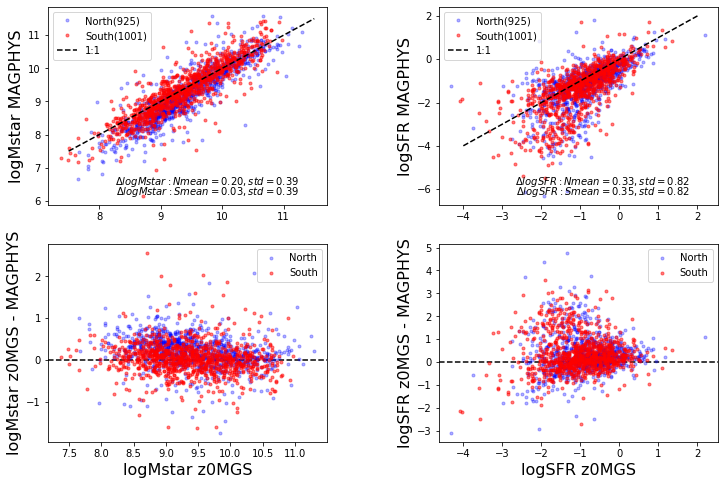

In [336]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=.4)
flag = (v.magphys['logMstar'] > 0) & (v.z0mgs['logmass'] > 0) 
plt.subplot(2,2,1)
plt.plot(v.z0mgs['logmass'][flag & Nflag],v.magphys['logMstar'][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
plt.plot(v.z0mgs['logmass'][flag & Sflag],v.magphys['logMstar'][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(7.5,11.5,50)

plt.plot(xline,xline,'k--',label='1:1')
#plt.axis([7.5,11.5,7.5,11.5])

Nmean = np.mean(v.z0mgs['logmass'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag])
Nrms = np.std(v.z0mgs['logmass'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag])
plt.text(0.9,0.1,"$\Delta logMstar: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")



Smean = np.mean(v.z0mgs['logmass'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag])
Srms = np.std(v.z0mgs['logmass'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag])
plt.text(0.9,0.05,"$\Delta logMstar: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")


#plt.xlabel('logMstar z0MGS',fontsize=16)
plt.ylabel('logMstar MAGPHYS',fontsize=16)
plt.legend()

###### RESIDUALS

Ndelta = v.z0mgs['logmass'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag]
Sdelta = v.z0mgs['logmass'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag]

plt.subplot(2,2,3)
plt.axhline(y=0,ls='--',c='k')
plt.plot(v.z0mgs['logmass'][flag & Nflag],Ndelta,'b.',alpha=.3,label='North')
plt.plot(v.z0mgs['logmass'][flag & Sflag],Sdelta,'r.',alpha=.5,label='South')

plt.xlabel('logMstar z0MGS',fontsize=16)
plt.ylabel('logMstar z0MGS - MAGPHYS',fontsize=16)

plt.legend()


####### SFRS


plt.subplot(2,2,2)
plt.plot(v.z0mgs['logsfr'][flag & Nflag],v.magphys['logSFR'][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
plt.plot(v.z0mgs['logsfr'][flag & Sflag],v.magphys['logSFR'][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(-4,2,50)
plt.plot(xline,xline,'k--',label='1:1')

delta = v.z0mgs['logsfr']-v.magphys['logSFR']
Nmean = np.mean(delta[flag & Nflag])
Nrms = np.std(delta[flag & Nflag])
plt.text(0.9,0.1,"$\Delta logSFR: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")


Smean = np.mean(delta[flag & Sflag])
Srms = np.std(delta[flag & Sflag])
plt.text(0.9,0.05,"$\Delta logSFR: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")

#plt.xlabel('logSFR z0MGS',fontsize=16)
plt.ylabel('logSFR MAGPHYS',fontsize=16)
#plt.axis([-3,2.5,-3,2.5])
plt.legend(loc='upper left')

###### RESIDUALS
plt.subplot(2,2,4)
plt.axhline(y=0,ls='--',color='k')
plt.plot(v.z0mgs['logsfr'][flag & Nflag],delta[flag & Nflag],'b.',alpha=.3,label="North")
plt.plot(v.z0mgs['logsfr'][flag & Sflag],delta[flag & Sflag],'r.',alpha=.5,label="South")
plt.xlabel('logSFR z0MGS',fontsize=16)
plt.ylabel('logSFR z0MGS - MAGPHYS',fontsize=16)
plt.legend()

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


logMstar: rms = 0.40


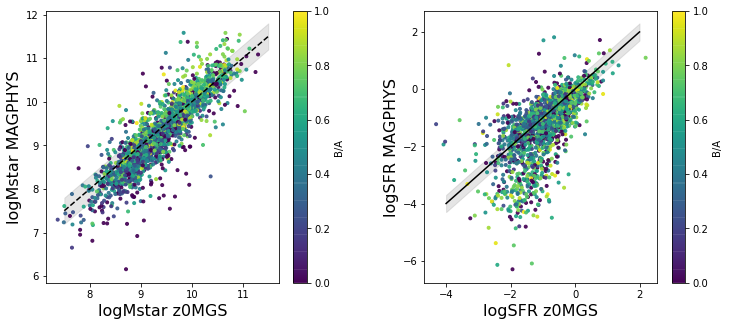

In [330]:
plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=.3)
flag = (v.magphys['logMstar'] > 0) & (v.z0mgs['logmass'] > 0) 
plt.subplot(1,2,1)

xline=np.linspace(7.5,11.5,50)
plt.plot(xline,xline,'k--',label='1:1')
#plt.axis([7.5,11.5,7.5,11.5])
plt.xlabel('logMstar z0MGS',fontsize=16)
plt.ylabel('logMstar MAGPHYS',fontsize=16)
plt.fill_between(xline,xline+.3,xline-.3,color='0.5',alpha=.2)
plt.scatter(v.z0mgs['logmass'][flag],v.magphys['logMstar'][flag],c=v.nsav0['SERSIC_BA'][flag],marker='.',alpha=.9)

rms = np.std(v.z0mgs['logmass'][flag]-v.magphys['logMstar'][flag])
print("logMstar: rms = {:.2f}".format(rms))
plt.colorbar(label='B/A')

plt.subplot(1,2,2)
#plt.plot(v.z0mgs['logsfr'][flag],v.magphys['logSFR'][flag],'k.',alpha=.3)

xline=np.linspace(-4,2,50)
plt.plot(xline,xline,'k-',label='1:1')
plt.fill_between(xline,xline+.3,xline-.3,color='0.5',alpha=.2)
plt.scatter(v.z0mgs['logsfr'][flag],v.magphys['logSFR'][flag],c=v.nsav0['SERSIC_BA'][flag],marker='.',alpha=.9)

plt.xlabel('logSFR z0MGS',fontsize=16)
plt.ylabel('logSFR MAGPHYS',fontsize=16)
plt.colorbar(label='B/A')


/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


number of matched =  1724


Text(0.95, 0.1, 'logMstar Taylor - MAGPHYS: mean=-0.12+/-0.40')

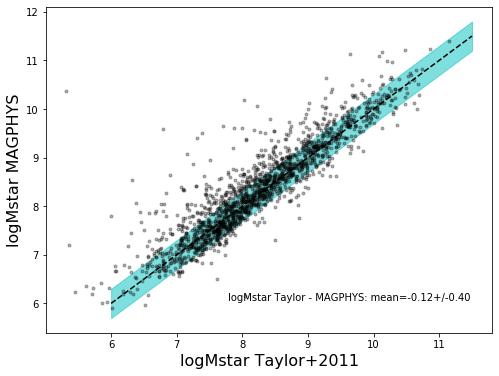

In [333]:
# compare with Taylor stellar mass

plt.figure(figsize=(8,6))
flag = (v.magphys['logMstar'] > 0) & (v.a100['logMstarTaylor'] > 0) 

plt.plot(v.a100['logMstarTaylor'][flag],v.magphys['logMstar'][flag],'k.',alpha=.3)
xline=np.linspace(6,11.5,50)
plt.plot(xline,xline,'k--')
#plt.axis([7.5,11.5,7.5,11.5])
plt.xlabel('logMstar Taylor+2011',fontsize=16)
plt.ylabel('logMstar MAGPHYS',fontsize=16)
plt.fill_between(xline,xline+.3,xline-.3,color='c',alpha=.5)

print('number of matched = ',np.sum(flag))
rms = np.std(v.a100['logMstarTaylor'][flag]-v.magphys['logMstar'][flag])
mean = np.mean(v.a100['logMstarTaylor'][flag]-v.magphys['logMstar'][flag])
plt.text(0.95,0.1,"logMstar Taylor - MAGPHYS: mean={:.2f}+/-{:.2f}".format(mean,rms),transform=plt.gca().transAxes,horizontalalignment='right')


0309


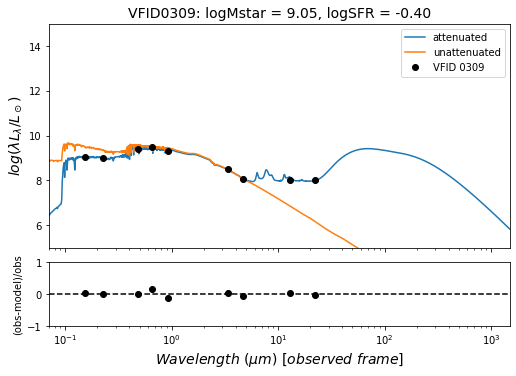

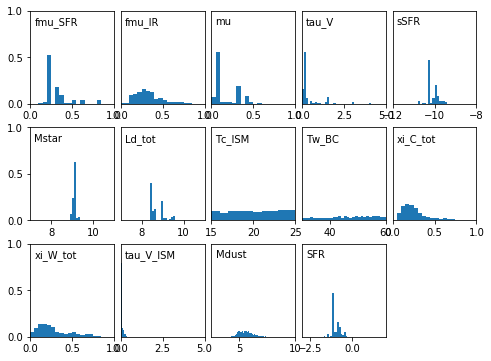

In [34]:
vfid = v.main['VFID'][v.main['VFID_V1']=='VFID0309'][0].replace('VFID','')
print(vfid)
plotone(vfid)

0386


/home/rfinn/github/virgoseds/python/sedFunctions.py:229: RuntimeWarning: divide by zero encountered in log10
  L_flux=np.log10((1.+z)*flux*frequency) # log of nu L_nu
/home/rfinn/github/virgoseds/python/sedFunctions.py:231: RuntimeWarning: divide by zero encountered in log10
  L_eflux_lo=np.log10((1.+z)*flux*frequency)-np.log10((1.+z)*flux*frequency-e_flux*(1.+z)*frequency)
/home/rfinn/github/virgoseds/python/sedFunctions.py:231: RuntimeWarning: invalid value encountered in log10
  L_eflux_lo=np.log10((1.+z)*flux*frequency)-np.log10((1.+z)*flux*frequency-e_flux*(1.+z)*frequency)
/home/rfinn/github/virgoseds/python/sedFunctions.py:232: RuntimeWarning: divide by zero encountered in log10
  L_eflux_hi=-np.log10((1.+z)*flux*frequency)+np.log10((1.+z)*flux*frequency+e_flux*(1.+z)*frequency)
/home/rfinn/github/virgoseds/python/sedFunctions.py:239: RuntimeWarning: divide by zero encountered in true_divide
  resid = (10.**L_flux - 10.**L_pflux)/10.**L_flux
/home/rfinn/github/virgoseds/python/s

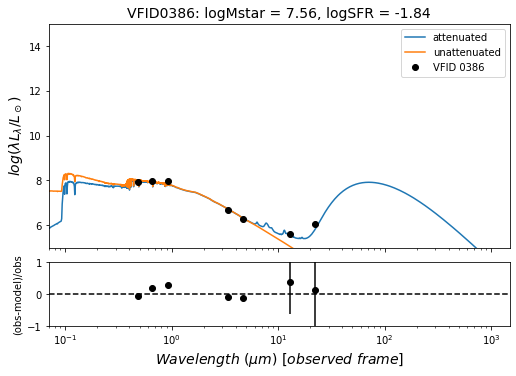

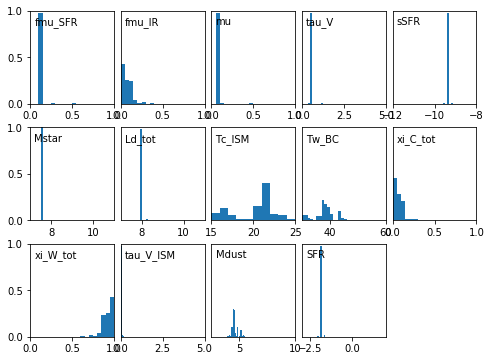

In [35]:
vfid = v.main['VFID'][v.main['VFID_V1']=='VFID0386'][0].replace('VFID','')
print(vfid)
plotone(vfid)

0473
0483
0531


/home/rfinn/github/virgoseds/python/sedFunctions.py:229: RuntimeWarning: invalid value encountered in log10
  L_flux=np.log10((1.+z)*flux*frequency) # log of nu L_nu
/home/rfinn/github/virgoseds/python/sedFunctions.py:231: RuntimeWarning: invalid value encountered in log10
  L_eflux_lo=np.log10((1.+z)*flux*frequency)-np.log10((1.+z)*flux*frequency-e_flux*(1.+z)*frequency)
/home/rfinn/github/virgoseds/python/sedFunctions.py:232: RuntimeWarning: invalid value encountered in log10
  L_eflux_hi=-np.log10((1.+z)*flux*frequency)+np.log10((1.+z)*flux*frequency+e_flux*(1.+z)*frequency)


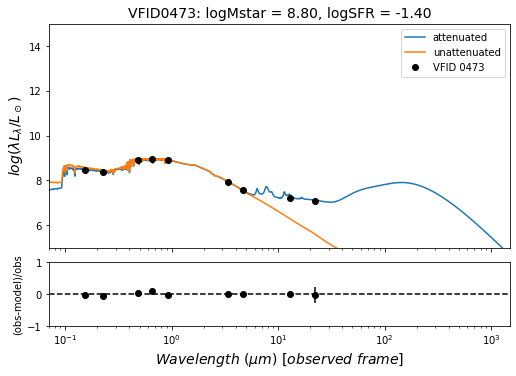

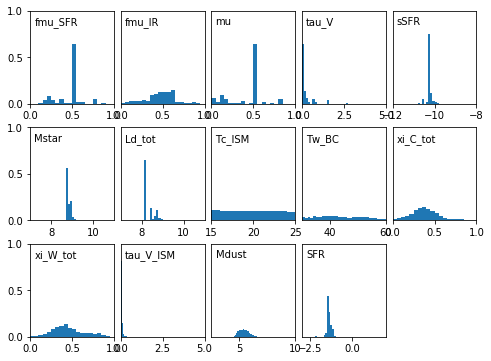

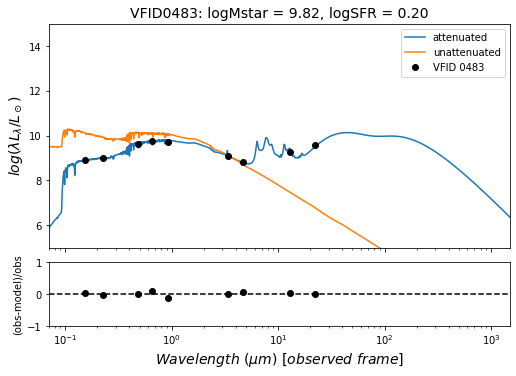

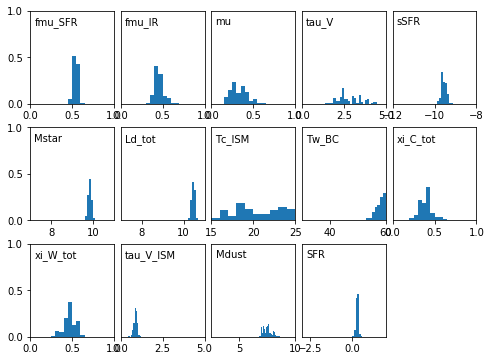

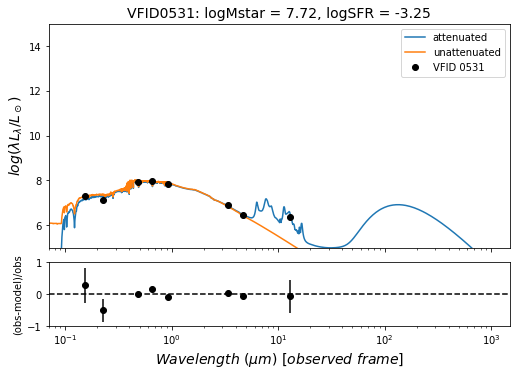

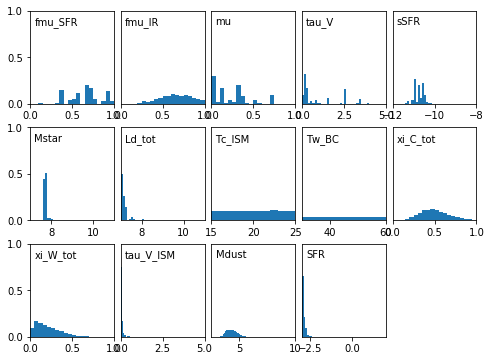

In [45]:
v1vfids = ["0473","0483","0531"]
for vf in v1vfids:
    vfid = v.main['VFID'][v.main['VFID_V1']==f'VFID{vf}'][0].replace('VFID','')
    print(vfid)
    plotone(vfid)

# AFTER EXTINCTION CORRECTION

In [355]:
%run ~/github/virgoseds/python/gatherMagphys.py
%run ~/github/Virgo/programs/readtablesv2.py

max directory =  6779
number processed =  5668


/home/rfinn/github/Virgo/programs/readtablesv2.py:129: RuntimeWarning: divide by zero encountered in log10
  r = 22.5 - 2.5*np.log10(dr9['FLUX_R'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:129: RuntimeWarning: invalid value encountered in log10
  r = 22.5 - 2.5*np.log10(dr9['FLUX_R'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:130: RuntimeWarning: divide by zero encountered in log10
  z = 22.5 - 2.5*np.log10(dr9['FLUX_Z'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:130: RuntimeWarning: invalid value encountered in log10
  z = 22.5 - 2.5*np.log10(dr9['FLUX_Z'])
/home/rfinn/github/Virgo/programs/readtablesv2.py:131: RuntimeWarning: divide by zero encountered in log10
  d_pc = self.env['Vcosmic']/H0*1.e6
/home/rfinn/github/Virgo/programs/readtablesv2.py:131: RuntimeWarning: invalid value encountered in log10
  d_pc = self.env['Vcosmic']/H0*1.e6
/home/rfinn/github/Virgo/programs/readtablesv2.py:133: RuntimeWarning: invalid value encountered in log10
  MG = g - const


/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


number of southern sources = 3369


[5.0, 12, -8, 2.5]

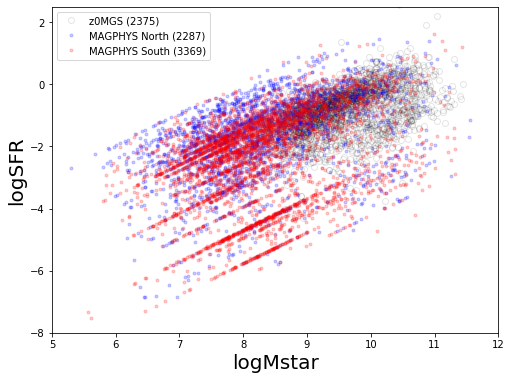

In [356]:
flag = (v.magphys['logMstar'] > 0) 
plt.figure(figsize=(8,6))

# overplot z0MGS
zflag = (v.z0mgs['logmass'] > 0) 
plt.plot(v.z0mgs['logmass'][zflag],v.z0mgs['logsfr'][zflag],'ko',mfc='None',alpha=.1,label=f'z0MGS ({np.sum(zflag)})')


Nflag = (v.magphys['logMstar'] > 0) & (v.main['DEC'] >= 32.375)
plt.plot(v.magphys['logMstar'][Nflag],v.magphys['logSFR'][Nflag],'b.',alpha=.2,label=f'MAGPHYS North ({np.sum(Nflag)})')


Sflag = (v.magphys['logMstar'] > 0) & (v.main['DEC'] < 32.375)
print(f"number of southern sources = {np.sum(Sflag)}")
plt.plot(v.magphys['logMstar'][Sflag],v.magphys['logSFR'][Sflag],'r.',alpha=.2,label=f'MAGPHYS South ({np.sum(Sflag)})')

plt.xlabel('logMstar',fontsize=20)

plt.ylabel('logSFR',fontsize=20)
plt.legend()
plt.axis([5.,12,-8,2.5])

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


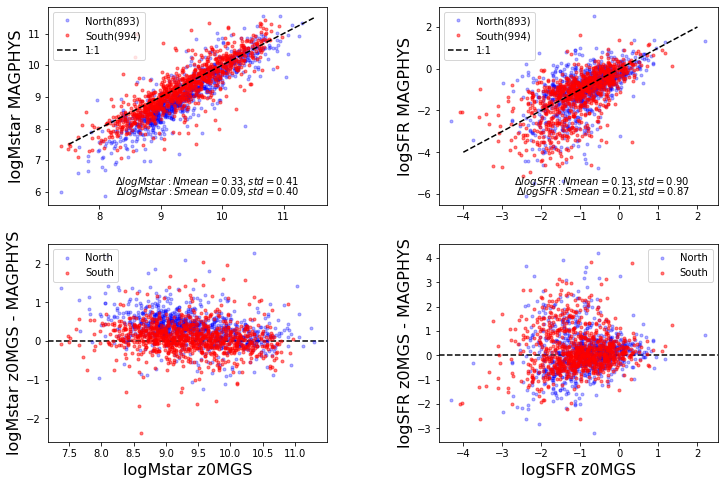

In [357]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=.4)
flag = (v.magphys['logMstar'] > 0) & (v.z0mgs['logmass'] > 0) 
plt.subplot(2,2,1)
plt.plot(v.z0mgs['logmass'][flag & Nflag],v.magphys['logMstar'][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
plt.plot(v.z0mgs['logmass'][flag & Sflag],v.magphys['logMstar'][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(7.5,11.5,50)

plt.plot(xline,xline,'k--',label='1:1')
#plt.axis([7.5,11.5,7.5,11.5])

Nmean = np.mean(v.z0mgs['logmass'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag])
Nrms = np.std(v.z0mgs['logmass'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag])
plt.text(0.9,0.1,"$\Delta logMstar: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")



Smean = np.mean(v.z0mgs['logmass'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag])
Srms = np.std(v.z0mgs['logmass'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag])
plt.text(0.9,0.05,"$\Delta logMstar: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")


#plt.xlabel('logMstar z0MGS',fontsize=16)
plt.ylabel('logMstar MAGPHYS',fontsize=16)
plt.legend(loc='upper left')

###### RESIDUALS

Ndelta = v.z0mgs['logmass'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag]
Sdelta = v.z0mgs['logmass'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag]

plt.subplot(2,2,3)
plt.axhline(y=0,ls='--',c='k')
plt.plot(v.z0mgs['logmass'][flag & Nflag],Ndelta,'b.',alpha=.3,label='North')
plt.plot(v.z0mgs['logmass'][flag & Sflag],Sdelta,'r.',alpha=.5,label='South')

plt.xlabel('logMstar z0MGS',fontsize=16)
plt.ylabel('logMstar z0MGS - MAGPHYS',fontsize=16)

plt.legend(loc='upper left')


####### SFRS


plt.subplot(2,2,2)
plt.plot(v.z0mgs['logsfr'][flag & Nflag],v.magphys['logSFR'][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
plt.plot(v.z0mgs['logsfr'][flag & Sflag],v.magphys['logSFR'][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(-4,2,50)
plt.plot(xline,xline,'k--',label='1:1')

delta = v.z0mgs['logsfr']-v.magphys['logSFR']
Nmean = np.mean(delta[flag & Nflag])
Nrms = np.std(delta[flag & Nflag])
plt.text(0.9,0.1,"$\Delta logSFR: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")


Smean = np.mean(delta[flag & Sflag])
Srms = np.std(delta[flag & Sflag])
plt.text(0.9,0.05,"$\Delta logSFR: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")

#plt.xlabel('logSFR z0MGS',fontsize=16)
plt.ylabel('logSFR MAGPHYS',fontsize=16)
#plt.axis([-3,2.5,-3,2.5])
plt.legend(loc='upper left')

###### RESIDUALS
plt.subplot(2,2,4)
plt.axhline(y=0,ls='--',color='k')
plt.plot(v.z0mgs['logsfr'][flag & Nflag],delta[flag & Nflag],'b.',alpha=.3,label="North")
plt.plot(v.z0mgs['logsfr'][flag & Sflag],delta[flag & Sflag],'r.',alpha=.5,label="South")
plt.xlabel('logSFR z0MGS',fontsize=16)
plt.ylabel('logSFR z0MGS - MAGPHYS',fontsize=16)
plt.legend()

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


number of matched =  1701


Text(0.95, 0.1, 'logMstar Taylor - MAGPHYS: mean=-0.11+/-0.42')

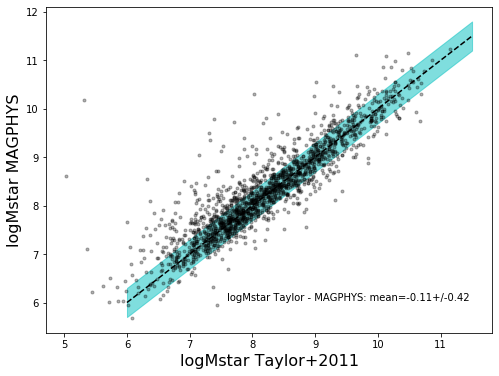

In [358]:
# compare with Taylor stellar mass

plt.figure(figsize=(8,6))
flag = (v.magphys['logMstar'] > 0) & (v.a100['logMstarTaylor'] > 0) 

plt.plot(v.a100['logMstarTaylor'][flag],v.magphys['logMstar'][flag],'k.',alpha=.3)
xline=np.linspace(6,11.5,50)
plt.plot(xline,xline,'k--')
#plt.axis([7.5,11.5,7.5,11.5])
plt.xlabel('logMstar Taylor+2011',fontsize=16)
plt.ylabel('logMstar MAGPHYS',fontsize=16)
plt.fill_between(xline,xline+.3,xline-.3,color='c',alpha=.5)

print('number of matched = ',np.sum(flag))
rms = np.std(v.a100['logMstarTaylor'][flag]-v.magphys['logMstar'][flag])
mean = np.mean(v.a100['logMstarTaylor'][flag]-v.magphys['logMstar'][flag])
plt.text(0.95,0.1,"logMstar Taylor - MAGPHYS: mean={:.2f}+/-{:.2f}".format(mean,rms),transform=plt.gca().transAxes,horizontalalignment='right')


## Compare Mstar and SFR before and after extinction correction

In [344]:
noext = Table.read('/home/rfinn/research/Virgo/tables-north/v2/magphys/vf_v2_magphys_03-Jun-2022.fits')

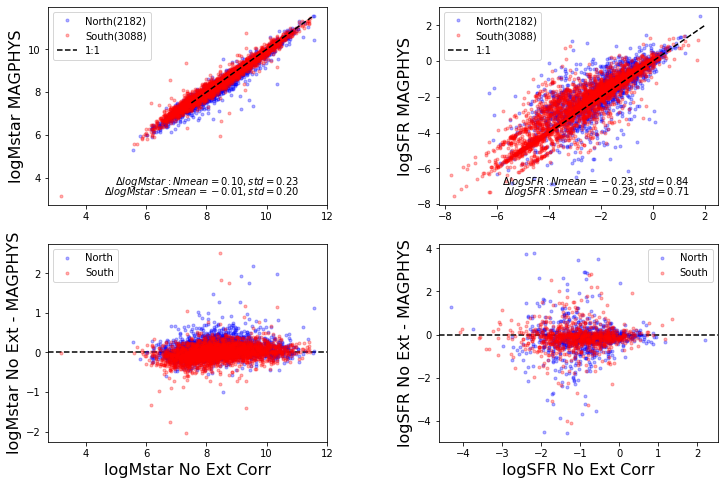

In [364]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=.4)
flag = (v.magphys['logMstar'] > 0) & (noext['logMstar'] > 0)
plt.subplot(2,2,1)
plt.plot(noext['logMstar'][flag & Nflag],v.magphys['logMstar'][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
plt.plot(noext['logMstar'][flag & Sflag],v.magphys['logMstar'][flag & Sflag],'r.',alpha=.3,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(7.5,11.5,50)

plt.plot(xline,xline,'k--',label='1:1')
#plt.axis([7.5,11.5,7.5,11.5])

Nmean = np.mean(noext['logMstar'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag])
Nrms = np.std(noext['logMstar'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag])
plt.text(0.9,0.1,"$\Delta logMstar: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")



Smean = np.mean(noext['logMstar'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag])
Srms = np.std(noext['logMstar'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag])
plt.text(0.9,0.05,"$\Delta logMstar: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")


#plt.xlabel('logMstar z0MGS',fontsize=16)
plt.ylabel('logMstar MAGPHYS',fontsize=16)
plt.legend()

###### RESIDUALS

Ndelta = noext['logMstar'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag]
Sdelta = noext['logMstar'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag]

plt.subplot(2,2,3)
plt.axhline(y=0,ls='--',c='k')
plt.plot(noext['logMstar'][flag & Nflag],Ndelta,'b.',alpha=.3,label='North')
plt.plot(noext['logMstar'][flag & Sflag],Sdelta,'r.',alpha=.3,label='South')

plt.xlabel('logMstar No Ext Corr',fontsize=16)
plt.ylabel('logMstar No Ext - MAGPHYS',fontsize=16)
                                      

plt.legend()


####### SFRS


plt.subplot(2,2,2)
                                      
x = noext['logSFR']
y = v.magphys['logSFR']
plt.plot(x[flag & Nflag],y[flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
plt.plot(x[flag & Sflag],y[flag & Sflag],'r.',alpha=.3,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(-4,2,50)
plt.plot(xline,xline,'k--',label='1:1')

delta = x-y
Nmean = np.mean(delta[flag & Nflag])
Nrms = np.std(delta[flag & Nflag])
plt.text(0.9,0.1,"$\Delta logSFR: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")


Smean = np.mean(delta[flag & Sflag])
Srms = np.std(delta[flag & Sflag])
plt.text(0.9,0.05,"$\Delta logSFR: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")

#plt.xlabel('logSFR z0MGS',fontsize=16)
plt.ylabel('logSFR MAGPHYS',fontsize=16)
#plt.axis([-3,2.5,-3,2.5])
plt.legend(loc='upper left')

###### RESIDUALS
plt.subplot(2,2,4)
plt.axhline(y=0,ls='--',color='k')
plt.plot(v.z0mgs['logsfr'][flag & Nflag],delta[flag & Nflag],'b.',alpha=.3,label="North")
plt.plot(v.z0mgs['logsfr'][flag & Sflag],delta[flag & Sflag],'r.',alpha=.3,label="South")
plt.xlabel('logSFR No Ext Corr',fontsize=16)
plt.ylabel('logSFR No Ext - MAGPHYS',fontsize=16)
plt.legend()

0473
0483
0531


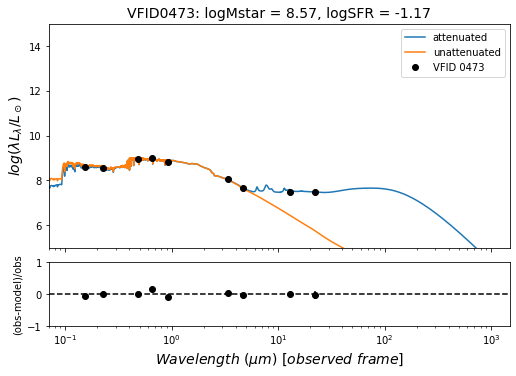

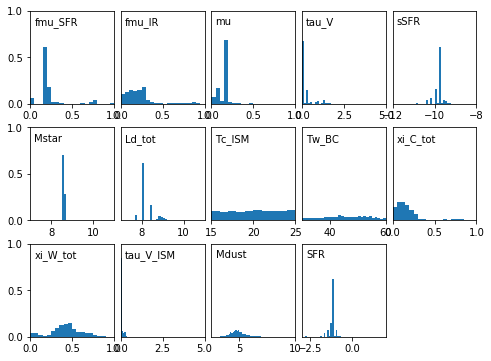

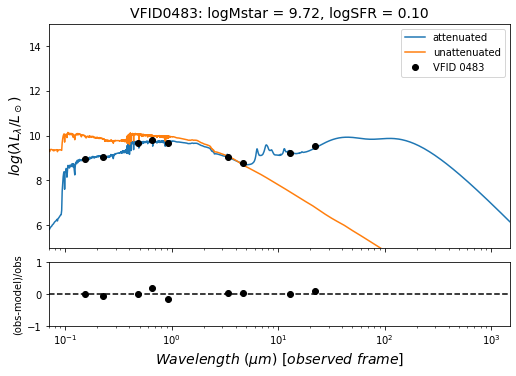

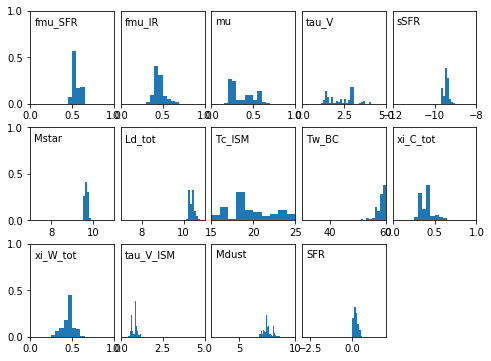

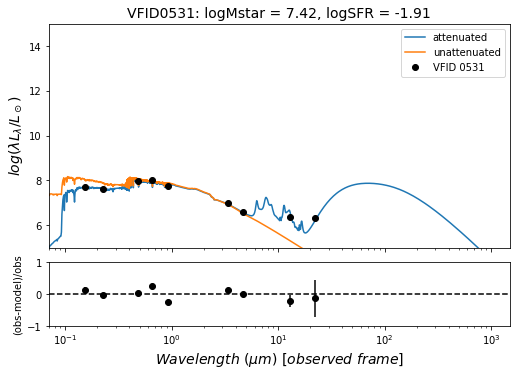

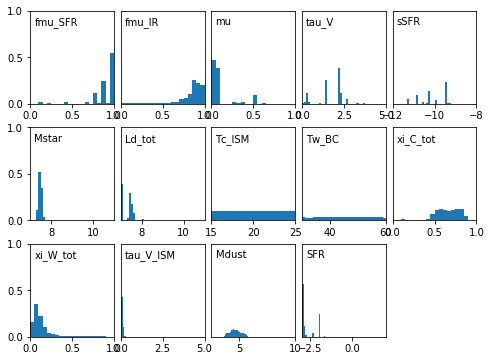

In [347]:
v1vfids = ["0473","0483","0531"]
for vf in v1vfids:
    vfid = v.main['VFID'][v.main['VFID_V1']==f'VFID{vf}'][0].replace('VFID','')
    print(vfid)
    plotone(vfid)

# Running Without z-band Data


In [ ]:
%run ~/github/virgoseds/python/gatherMagphys.py --magdir /home/rfinn/research/Virgo/magphys/magphysParallelGrawp/output --plot

In [ ]:
python ~/github/virgoseds/python/gatherMagphys.py --magdir /home/rfinn/research/Virgo/magphys/magphysParallelGrawp/output-nozband --plot 


# Read in results

In [13]:
%run ~/github/Virgo/programs/readtablesv2.py
Nflag = (v.main['DEC'] >= 32.375)
Sflag = (v.main['DEC'] < 32.375)

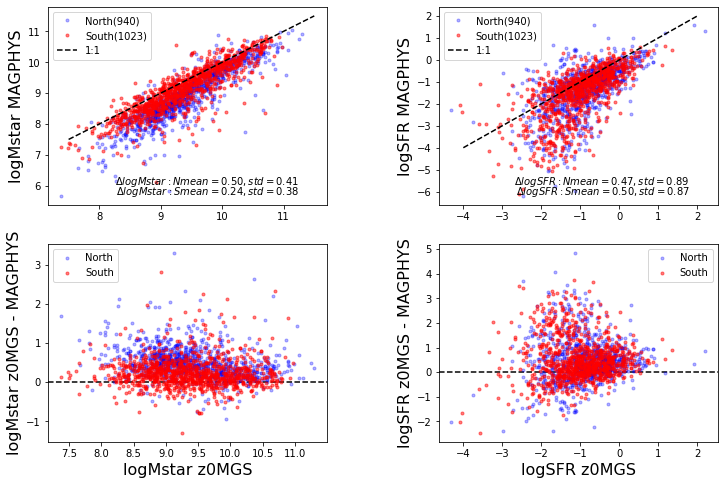

In [14]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=.4)
flag = (v.magphys['logMstar'] > 0) & (v.z0mgs['logmass'] > 0) 
plt.subplot(2,2,1)
plt.plot(v.z0mgs['logmass'][flag & Nflag],v.magphys['logMstar'][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
plt.plot(v.z0mgs['logmass'][flag & Sflag],v.magphys['logMstar'][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(7.5,11.5,50)

plt.plot(xline,xline,'k--',label='1:1')
#plt.axis([7.5,11.5,7.5,11.5])

Nmean = np.mean(v.z0mgs['logmass'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag])
Nrms = np.std(v.z0mgs['logmass'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag])
plt.text(0.9,0.1,"$\Delta logMstar: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")



Smean = np.mean(v.z0mgs['logmass'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag])
Srms = np.std(v.z0mgs['logmass'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag])
plt.text(0.9,0.05,"$\Delta logMstar: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")


#plt.xlabel('logMstar z0MGS',fontsize=16)
plt.ylabel('logMstar MAGPHYS',fontsize=16)
plt.legend(loc='upper left')

###### RESIDUALS

Ndelta = v.z0mgs['logmass'][flag & Nflag]-v.magphys['logMstar'][flag & Nflag]
Sdelta = v.z0mgs['logmass'][flag & Sflag]-v.magphys['logMstar'][flag & Sflag]

plt.subplot(2,2,3)
plt.axhline(y=0,ls='--',c='k')
plt.plot(v.z0mgs['logmass'][flag & Nflag],Ndelta,'b.',alpha=.3,label='North')
plt.plot(v.z0mgs['logmass'][flag & Sflag],Sdelta,'r.',alpha=.5,label='South')

plt.xlabel('logMstar z0MGS',fontsize=16)
plt.ylabel('logMstar z0MGS - MAGPHYS',fontsize=16)

plt.legend(loc='upper left')


####### SFRS


plt.subplot(2,2,2)
plt.plot(v.z0mgs['logsfr'][flag & Nflag],v.magphys['logSFR'][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
plt.plot(v.z0mgs['logsfr'][flag & Sflag],v.magphys['logSFR'][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(-4,2,50)
plt.plot(xline,xline,'k--',label='1:1')

delta = v.z0mgs['logsfr']-v.magphys['logSFR']
Nmean = np.mean(delta[flag & Nflag])
Nrms = np.std(delta[flag & Nflag])
plt.text(0.9,0.1,"$\Delta logSFR: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")


Smean = np.mean(delta[flag & Sflag])
Srms = np.std(delta[flag & Sflag])
plt.text(0.9,0.05,"$\Delta logSFR: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")

#plt.xlabel('logSFR z0MGS',fontsize=16)
plt.ylabel('logSFR MAGPHYS',fontsize=16)
#plt.axis([-3,2.5,-3,2.5])
plt.legend(loc='upper left')

###### RESIDUALS
plt.subplot(2,2,4)
plt.axhline(y=0,ls='--',color='k')
plt.plot(v.z0mgs['logsfr'][flag & Nflag],delta[flag & Nflag],'b.',alpha=.3,label="North")
plt.plot(v.z0mgs['logsfr'][flag & Sflag],delta[flag & Sflag],'r.',alpha=.5,label="South")
plt.xlabel('logSFR z0MGS',fontsize=16)
plt.ylabel('logSFR z0MGS - MAGPHYS',fontsize=16)
plt.legend()

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


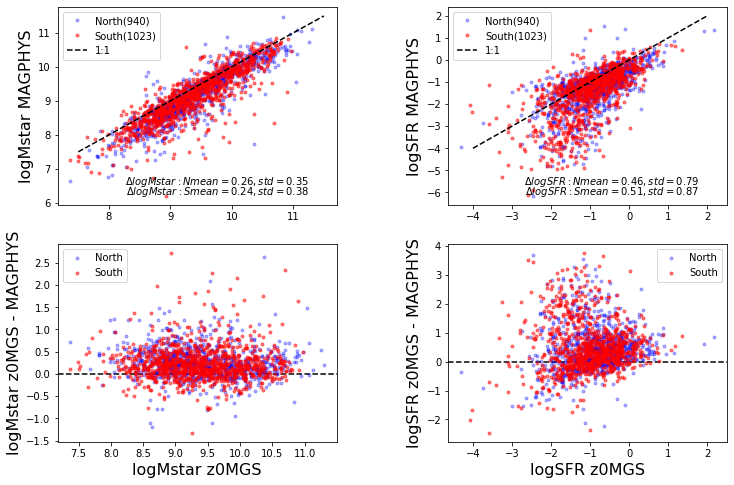

In [15]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=.4)
flag = (v.magphys_noz['logMstar'] > 0) & (v.z0mgs['logmass'] > 0) 
plt.subplot(2,2,1)
plt.plot(v.z0mgs['logmass'][flag & Nflag],v.magphys_noz['logMstar'][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
plt.plot(v.z0mgs['logmass'][flag & Sflag],v.magphys_noz['logMstar'][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(7.5,11.5,50)

plt.plot(xline,xline,'k--',label='1:1')
#plt.axis([7.5,11.5,7.5,11.5])

Nmean = np.mean(v.z0mgs['logmass'][flag & Nflag]-v.magphys_noz['logMstar'][flag & Nflag])
Nrms = np.std(v.z0mgs['logmass'][flag & Nflag]-v.magphys_noz['logMstar'][flag & Nflag])
plt.text(0.9,0.1,"$\Delta logMstar: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")



Smean = np.mean(v.z0mgs['logmass'][flag & Sflag]-v.magphys_noz['logMstar'][flag & Sflag])
Srms = np.std(v.z0mgs['logmass'][flag & Sflag]-v.magphys_noz['logMstar'][flag & Sflag])
plt.text(0.9,0.05,"$\Delta logMstar: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")


#plt.xlabel('logMstar z0MGS',fontsize=16)
plt.ylabel('logMstar MAGPHYS',fontsize=16)
plt.legend(loc='upper left')

###### RESIDUALS

Ndelta = v.z0mgs['logmass'][flag & Nflag]-v.magphys_noz['logMstar'][flag & Nflag]
Sdelta = v.z0mgs['logmass'][flag & Sflag]-v.magphys_noz['logMstar'][flag & Sflag]

plt.subplot(2,2,3)
plt.axhline(y=0,ls='--',c='k')
plt.plot(v.z0mgs['logmass'][flag & Nflag],Ndelta,'b.',alpha=.3,label='North')
plt.plot(v.z0mgs['logmass'][flag & Sflag],Sdelta,'r.',alpha=.5,label='South')

plt.xlabel('logMstar z0MGS',fontsize=16)
plt.ylabel('logMstar z0MGS - MAGPHYS',fontsize=16)

plt.legend(loc='upper left')


####### SFRS


plt.subplot(2,2,2)
plt.plot(v.z0mgs['logsfr'][flag & Nflag],v.magphys_noz['logSFR'][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
plt.plot(v.z0mgs['logsfr'][flag & Sflag],v.magphys_noz['logSFR'][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(-4,2,50)
plt.plot(xline,xline,'k--',label='1:1')

delta = v.z0mgs['logsfr']-v.magphys_noz['logSFR']
Nmean = np.mean(delta[flag & Nflag])
Nrms = np.std(delta[flag & Nflag])
plt.text(0.9,0.1,"$\Delta logSFR: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")


Smean = np.mean(delta[flag & Sflag])
Srms = np.std(delta[flag & Sflag])
plt.text(0.9,0.05,"$\Delta logSFR: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")

#plt.xlabel('logSFR z0MGS',fontsize=16)
plt.ylabel('logSFR MAGPHYS',fontsize=16)
#plt.axis([-3,2.5,-3,2.5])
plt.legend(loc='upper left')

###### RESIDUALS
plt.subplot(2,2,4)
plt.axhline(y=0,ls='--',color='k')
plt.plot(v.z0mgs['logsfr'][flag & Nflag],delta[flag & Nflag],'b.',alpha=.3,label="North")
plt.plot(v.z0mgs['logsfr'][flag & Sflag],delta[flag & Sflag],'r.',alpha=.5,label="South")
plt.xlabel('logSFR z0MGS',fontsize=16)
plt.ylabel('logSFR z0MGS - MAGPHYS',fontsize=16)
plt.legend()

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


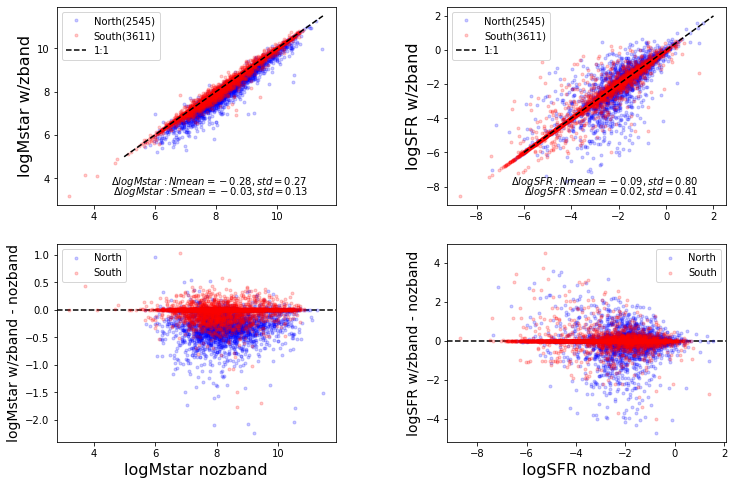

In [38]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=.4)
flag = (v.magphys_noz['logMstar'] > 0) & (v.magphys['logMstar'] > 0) 
plt.subplot(2,2,1)
plt.plot(v.magphys_noz['logMstar'][flag & Nflag],v.magphys['logMstar'][flag & Nflag],'b.',alpha=.2,label=f"North({np.sum(flag&Nflag)})")
plt.plot(v.magphys_noz['logMstar'][flag & Sflag],v.magphys['logMstar'][flag & Sflag],'r.',alpha=.2,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(5,11.5,50)

plt.plot(xline,xline,'k--',label='1:1')
#plt.axis([7.5,11.5,7.5,11.5])

deltam = v.magphys['logMstar']-v.magphys_noz['logMstar']
Nmean = np.mean(deltam[flag & Nflag])
Nrms = np.std(deltam[flag & Nflag])
plt.text(0.9,0.1,"$\Delta logMstar: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")



Smean = np.mean(deltam[flag & Sflag])
Srms = np.std(deltam[flag & Sflag])
plt.text(0.9,0.05,"$\Delta logMstar: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")


#plt.xlabel('logMstar magphys',fontsize=16)
plt.ylabel('logMstar w/zband',fontsize=16)
plt.legend(loc='upper left')

###### RESIDUALS

Ndelta = deltam[flag & Nflag]
Sdelta = deltam[flag & Sflag]

plt.subplot(2,2,3)
plt.axhline(y=0,ls='--',c='k')
plt.plot(v.magphys_noz['logMstar'][flag & Nflag],Ndelta,'b.',alpha=.2,label='North')
plt.plot(v.magphys_noz['logMstar'][flag & Sflag],Sdelta,'r.',alpha=.2,label='South')

plt.xlabel('logMstar nozband',fontsize=16)
plt.ylabel('logMstar w/zband - nozband',fontsize=14)

plt.legend(loc='upper left')


####### SFRS


plt.subplot(2,2,2)
plt.plot(v.magphys_noz['logSFR'][flag & Nflag],v.magphys['logSFR'][flag & Nflag],'b.',alpha=.2,label=f"North({np.sum(flag&Nflag)})")
plt.plot(v.magphys_noz['logSFR'][flag & Sflag],v.magphys['logSFR'][flag & Sflag],'r.',alpha=.2,label=f"South({np.sum(flag&Sflag)})")
xline=np.linspace(-6,2,50)
plt.plot(xline,xline,'k--',label='1:1')

delta = v.magphys['logSFR']-v.magphys_noz['logSFR']
Nmean = np.mean(delta[flag & Nflag])
Nrms = np.std(delta[flag & Nflag])
plt.text(0.9,0.1,"$\Delta logSFR: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")


Smean = np.mean(delta[flag & Sflag])
Srms = np.std(delta[flag & Sflag])
plt.text(0.9,0.05,"$\Delta logSFR: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")

#plt.xlabel('logSFR magphys',fontsize=16)
plt.ylabel('logSFR w/zband',fontsize=16)
#plt.axis([-3,2.5,-3,2.5])
plt.legend(loc='upper left')

###### RESIDUALS
plt.subplot(2,2,4)
plt.axhline(y=0,ls='--',color='k')
plt.plot(v.magphys_noz['logSFR'][flag & Nflag],delta[flag & Nflag],'b.',alpha=.2,label="North")
plt.plot(v.magphys_noz['logSFR'][flag & Sflag],delta[flag & Sflag],'r.',alpha=.2,label="South")
plt.xlabel('logSFR nozband',fontsize=16)
plt.ylabel('logSFR w/zband - nozband',fontsize=14)
plt.legend()

### Striping still in main sequence?

ANSWER = yes

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)
/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


number of southern sources = 3611


[5.0, 12, -8, 2.5]

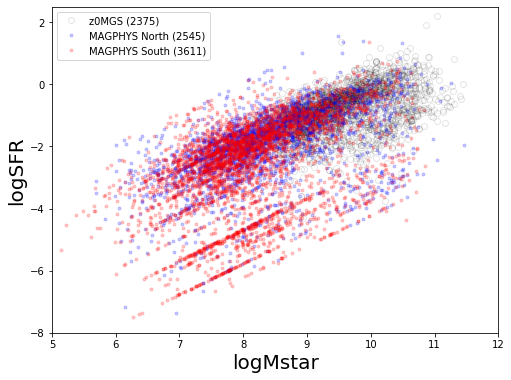

In [30]:
flag = (v.magphys_noz['logMstar'] > 0) 
plt.figure(figsize=(8,6))

# overplot z0MGS
zflag = (v.z0mgs['logmass'] > 0) 
plt.plot(v.z0mgs['logmass'][zflag],v.z0mgs['logsfr'][zflag],'ko',mfc='None',alpha=.1,label=f'z0MGS ({np.sum(zflag)})')


Nflag = (v.magphys_noz['logMstar'] > 0) & (v.main['DEC'] >= 32.375)
plt.plot(v.magphys_noz['logMstar'][Nflag],v.magphys_noz['logSFR'][Nflag],'b.',alpha=.2,label=f'MAGPHYS North ({np.sum(Nflag)})')


Sflag = (v.magphys_noz['logMstar'] > 0) & (v.main['DEC'] < 32.375)
print(f"number of southern sources = {np.sum(Sflag)}")
plt.plot(v.magphys_noz['logMstar'][Sflag],v.magphys_noz['logSFR'][Sflag],'r.',alpha=.2,label=f'MAGPHYS South ({np.sum(Sflag)})')

plt.xlabel('logMstar',fontsize=20)

plt.ylabel('logSFR',fontsize=20)
plt.legend()
plt.axis([5.,12,-8,2.5])

In [40]:
os.chdir('/home/rfinn/research/Virgo/magphys/magphysParallelGrawp/output-nozband/')

/home/rfinn/github/virgoseds/python/sedFunctions.py:229: RuntimeWarning: divide by zero encountered in log10
  L_flux=np.log10((1.+z)*flux*frequency) # log of nu L_nu
/home/rfinn/github/virgoseds/python/sedFunctions.py:229: RuntimeWarning: invalid value encountered in log10
  L_flux=np.log10((1.+z)*flux*frequency) # log of nu L_nu
/home/rfinn/github/virgoseds/python/sedFunctions.py:231: RuntimeWarning: divide by zero encountered in log10
  L_eflux_lo=np.log10((1.+z)*flux*frequency)-np.log10((1.+z)*flux*frequency-e_flux*(1.+z)*frequency)
/home/rfinn/github/virgoseds/python/sedFunctions.py:231: RuntimeWarning: invalid value encountered in log10
  L_eflux_lo=np.log10((1.+z)*flux*frequency)-np.log10((1.+z)*flux*frequency-e_flux*(1.+z)*frequency)
/home/rfinn/github/virgoseds/python/sedFunctions.py:232: RuntimeWarning: divide by zero encountered in log10
  L_eflux_hi=-np.log10((1.+z)*flux*frequency)+np.log10((1.+z)*flux*frequency+e_flux*(1.+z)*frequency)
/home/rfinn/github/virgoseds/python/s

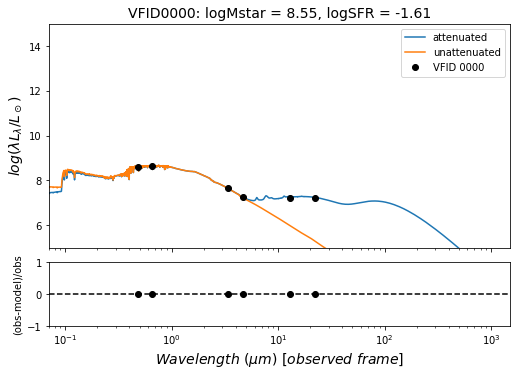

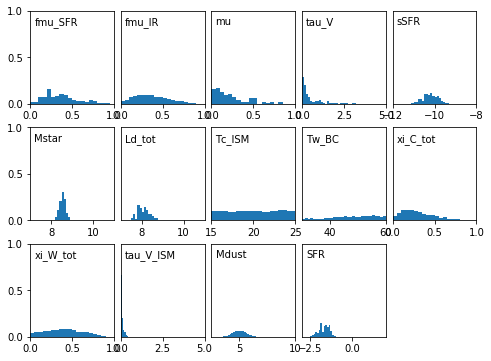

In [42]:
plotone('0000')

In [72]:
def testplot(vfid):
    topdir = os.getcwd()
    %run ~/github/virgoseds/python/sedFunctions.py

    os.chdir(vfid)

    wavelengths = np.array([ 0.1516,0.2267,0.48623,0.64606,0.91993,3.40025,4.65201,12.81034,22.37528],'d')
    s = magphys_sed(vfid,wavelengths)
    s.plot_sed_pdfs()
    
    os.chdir(topdir)

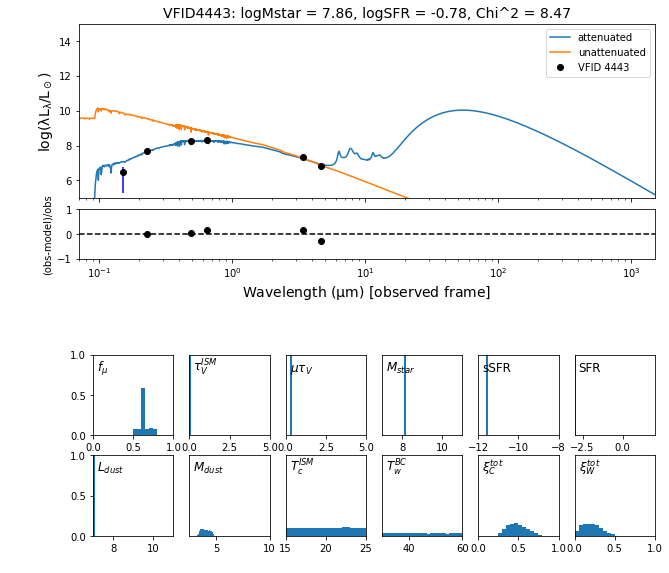

In [73]:
os.chdir('/home/rfinn/research/Virgo/magphys/magphysParallelGrawp/output-nozband/')
testplot('4443')

# Updates Jan 2024


* remake plots using July 2023 run, which uses JM's latest photometry catalogs
* compare with and w/out extinction correction
* make sure we are using z band

* we use fluxes from AP06 - need to convert to total mass, or atleast compare AP06 vs total mag

In [1]:
import os
from matplotlib import pyplot as plt

In [100]:
# move to plots directories
homedir = os.getenv("HOME")
os.chdir(os.path.join(homedir,'research/Virgo/magphys/plots/'))

In [101]:
%run ~/github/Virgo/programs/readtablesv2.py
Nflag = (v.main['DEC'] >= 32.375)
Sflag = (v.main['DEC'] < 32.375)

## Comparing with z0MGS Mstar and SFR

In [4]:

def compare2z0mgs(mptab,mlabel="magphys",medflag=False):
    """pass in magphys table to use when comparing to z0mgs"""
    plt.figure(figsize=(12,8))
    plt.subplots_adjust(wspace=.4)

    if medflag:
        masskey='logMstar-med'
        sfrkey='logSFR-med'
    else:
        masskey='logMstar'
        sfrkey='logSFR'
    flag = (mptab[masskey] > 0) & (v.z0mgs['logmass'] > 0) 
    plt.subplot(2,2,1)
    plt.plot(v.z0mgs['logmass'][flag & Nflag],mptab[masskey][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
    plt.plot(v.z0mgs['logmass'][flag & Sflag],mptab[masskey][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
    xline=np.linspace(7.5,11.5,50)

    plt.plot(xline,xline,'k--',label='1:1')
    #plt.axis([7.5,11.5,7.5,11.5])

    Nmean = np.mean(v.z0mgs['logmass'][flag & Nflag]-mptab[masskey][flag & Nflag])
    Nrms = np.std(v.z0mgs['logmass'][flag & Nflag]-mptab[masskey][flag & Nflag])
    plt.text(0.9,0.1,"$\Delta logMstar: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")



    Smean = np.mean(v.z0mgs['logmass'][flag & Sflag]-mptab[masskey][flag & Sflag])
    Srms = np.std(v.z0mgs['logmass'][flag & Sflag]-mptab[masskey][flag & Sflag])
    plt.text(0.9,0.05,"$\Delta logMstar: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")


    #plt.xlabel('logMstar z0MGS',fontsize=16)
    plt.ylabel('logMstar MAGPHYS',fontsize=16)
    plt.legend(loc='upper left')

    ###### RESIDUALS

    Ndelta = v.z0mgs['logmass'][flag & Nflag]-mptab[masskey][flag & Nflag]
    Sdelta = v.z0mgs['logmass'][flag & Sflag]-mptab[masskey][flag & Sflag]

    plt.subplot(2,2,3)
    plt.axhline(y=0,ls='--',c='k')
    plt.plot(v.z0mgs['logmass'][flag & Nflag],Ndelta,'b.',alpha=.3,label='North')
    plt.plot(v.z0mgs['logmass'][flag & Sflag],Sdelta,'r.',alpha=.5,label='South')

    plt.xlabel('logMstar z0MGS',fontsize=16)
    plt.ylabel('logMstar z0MGS - MAGPHYS',fontsize=16)

    plt.legend(loc='upper left')


    ####### SFRS


    plt.subplot(2,2,2)
    plt.plot(v.z0mgs['logsfr'][flag & Nflag],mptab[sfrkey][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
    plt.plot(v.z0mgs['logsfr'][flag & Sflag],mptab[sfrkey][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
    xline=np.linspace(-4,2,50)
    plt.plot(xline,xline,'k--',label='1:1')

    delta = v.z0mgs['logsfr']-mptab[sfrkey]
    Nmean = np.mean(delta[flag & Nflag])
    Nrms = np.std(delta[flag & Nflag])
    plt.text(0.9,0.1,"$\Delta logSFR: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")


    Smean = np.mean(delta[flag & Sflag])
    Srms = np.std(delta[flag & Sflag])
    plt.text(0.9,0.05,"$\Delta logSFR: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")

    #plt.xlabel('logSFR z0MGS',fontsize=16)
    plt.ylabel('logSFR MAGPHYS',fontsize=16)
    #plt.axis([-3,2.5,-3,2.5])
    plt.legend(loc='upper left')

    ###### RESIDUALS
    plt.subplot(2,2,4)
    plt.axhline(y=0,ls='--',color='k')
    plt.plot(v.z0mgs['logsfr'][flag & Nflag],delta[flag & Nflag],'b.',alpha=.3,label="North")
    plt.plot(v.z0mgs['logsfr'][flag & Sflag],delta[flag & Sflag],'r.',alpha=.5,label="South")
    plt.xlabel('logSFR z0MGS',fontsize=16)
    plt.ylabel('logSFR z0MGS - MAGPHYS',fontsize=16)
    plt.legend()

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


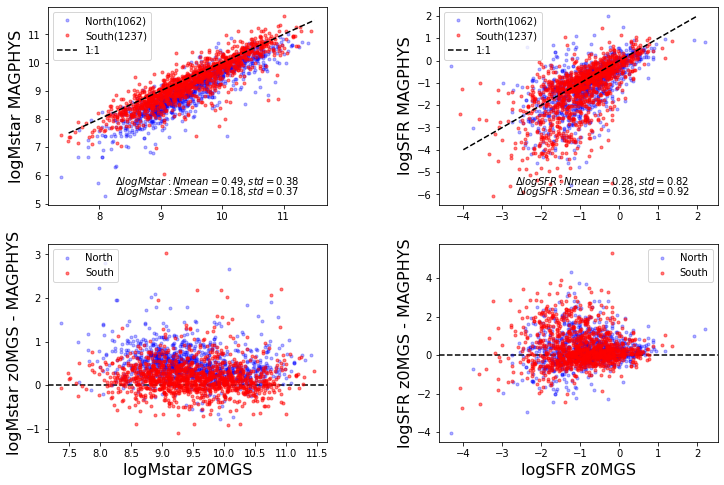

In [10]:
mptab = v.magphys
compare2z0mgs(mptab)

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


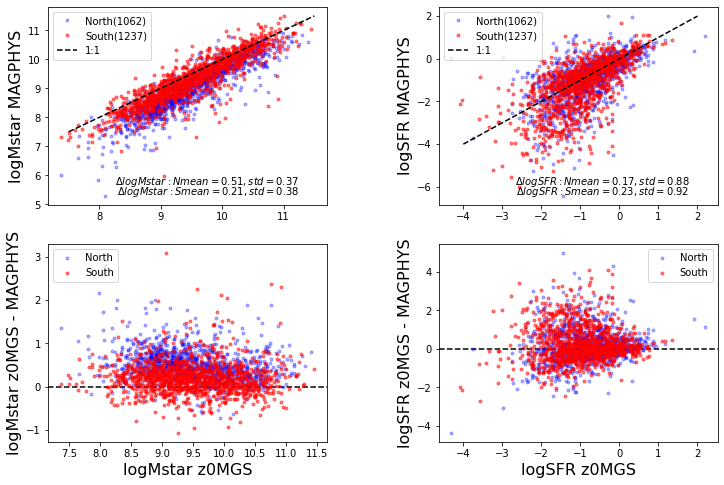

In [11]:
mptab = v.magphys_lext
compare2z0mgs(mptab)

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


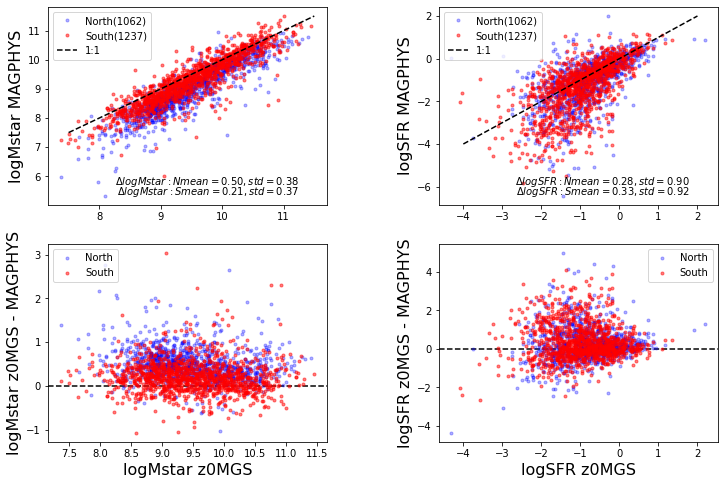

In [12]:
mptab = v.magphys_sext
compare2z0mgs(mptab)

## Comparing magphys with and w/out extinction corrections


#### Summary

* The stellar mass estimates do not seem to be affected by the extinction correction.  That seems odd...
* SFRs are not strongly affected - this also seems odd...  
* The SFRs increase by 
    * ~ 0.12 dex when using the Legacy Extinction
    * neglible amount when using the Salim Extinction

In [5]:
def compare2magphys(mptab1,mptab2,mlabel1="magphys",mlabel2="magphys_legext",usemed=False):
    """pass in magphys table to use when comparing to z0mgs"""
    if usemed:
        masskey = 'logMstar-med'
        sfrkey = 'logSFR-med'
    else:
        masskey = 'logMstar'
        sfrkey = 'logSFR'        
    Nflag = (v.main['DEC'] >= 32.375)
    Sflag = (v.main['DEC'] < 32.375)
    plt.figure(figsize=(12,8))
    plt.subplots_adjust(wspace=.4)

    flag = (mptab1[masskey] > 0) & (mptab2[masskey] > 0) 
    plt.subplot(2,2,1)
    plt.plot(mptab1[masskey][flag & Nflag],mptab2[masskey][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
    plt.plot(mptab1[masskey][flag & Sflag],mptab2[masskey][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
    xline=np.linspace(7.5,11.5,50)

    plt.plot(xline,xline,'k--',label='1:1')
    #plt.axis([7.5,11.5,7.5,11.5])

    Nmean = np.mean(mptab1[masskey][flag & Nflag]-mptab2[masskey][flag & Nflag])
    Nrms = np.std(mptab1[masskey][flag & Nflag]-mptab2[masskey][flag & Nflag])
    plt.text(0.9,0.1,"$\Delta logMstar: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")



    Smean = np.mean(mptab1[masskey][flag & Sflag]-mptab2[masskey][flag & Sflag])
    Srms = np.std(mptab1[masskey][flag & Sflag]-mptab2[masskey][flag & Sflag])
    plt.text(0.9,0.05,"$\Delta logMstar: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")


    #plt.xlabel('logMstar z0MGS',fontsize=16)
    plt.ylabel('logMstar '+mlabel2,fontsize=16)
    plt.legend(loc='upper left')

    ###### RESIDUALS

    Ndelta = mptab1[masskey][flag & Nflag]-mptab2[masskey][flag & Nflag]
    Sdelta = mptab1[masskey][flag & Sflag]-mptab2[masskey][flag & Sflag]

    plt.subplot(2,2,3)
    plt.axhline(y=0,ls='--',c='k')
    plt.plot(mptab1[masskey][flag & Nflag],Ndelta,'b.',alpha=.3,label='North')
    plt.plot(mptab1[masskey][flag & Sflag],Sdelta,'r.',alpha=.5,label='South')

    plt.xlabel('logMstar '+mlabel1,fontsize=16)
    plt.ylabel(mlabel1+' - '+mlabel2,fontsize=16)

    plt.legend(loc='upper left')


    ####### SFRS


    plt.subplot(2,2,2)
    plt.plot(mptab1[sfrkey][flag & Nflag],mptab2[sfrkey][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
    plt.plot(mptab1[sfrkey][flag & Sflag],mptab2[sfrkey][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
    xline=np.linspace(-4,2,50)
    plt.plot(xline,xline,'k--',label='1:1')

    delta = mptab1[sfrkey]-mptab2[sfrkey]
    Nmean = np.mean(delta[flag & Nflag])
    Nrms = np.std(delta[flag & Nflag])
    plt.text(0.9,0.1,"$\Delta logSFR: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")


    Smean = np.mean(delta[flag & Sflag])
    Srms = np.std(delta[flag & Sflag])
    plt.text(0.9,0.05,"$\Delta logSFR: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")

    #plt.xlabel('logSFR z0MGS',fontsize=16)
    plt.ylabel('logSFR '+mlabel2,fontsize=16)
    #plt.axis([-3,2.5,-3,2.5])
    plt.legend(loc='upper left')

    ###### RESIDUALS
    plt.subplot(2,2,4)
    plt.axhline(y=0,ls='--',color='k')
    plt.plot(mptab1[sfrkey][flag & Nflag],delta[flag & Nflag],'b.',alpha=.3,label="North")
    plt.plot(mptab1[sfrkey][flag & Sflag],delta[flag & Sflag],'r.',alpha=.5,label="South")
    #plt.plot(mptab1[sfrkey][flag & Nflag],delta[flag & Nflag],'b.',alpha=.3,label="North")
    plt.xlabel('logSFR '+mlabel1,fontsize=16)
    plt.ylabel('logSFR '+mlabel1+'-'+mlabel2,fontsize=16)
    plt.legend()

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


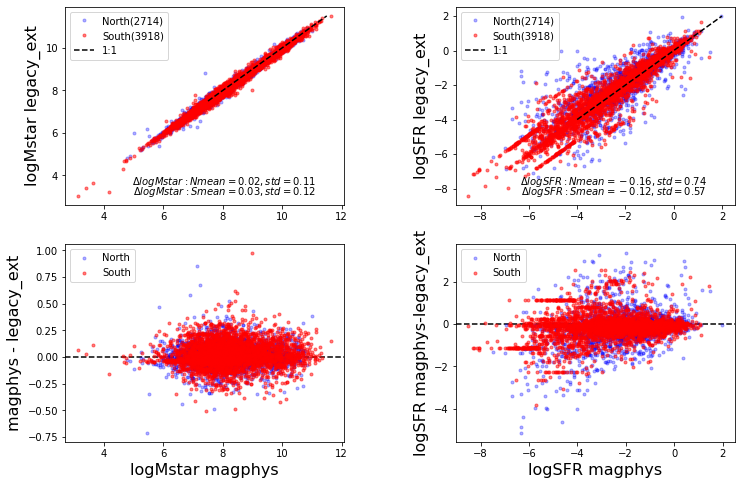

In [19]:
mptab1 = v.magphys
mptab2 = v.magphys_lext
compare2magphys(mptab1,mptab2,mlabel2='legacy_ext')

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1157: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


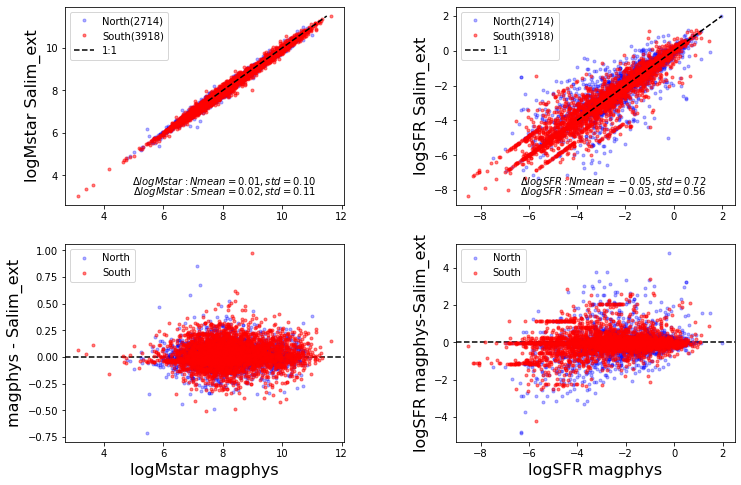

In [18]:
mptab1 = v.magphys
mptab2 = v.magphys_sext
compare2magphys(mptab1,mptab2,mlabel2='Salim_ext')

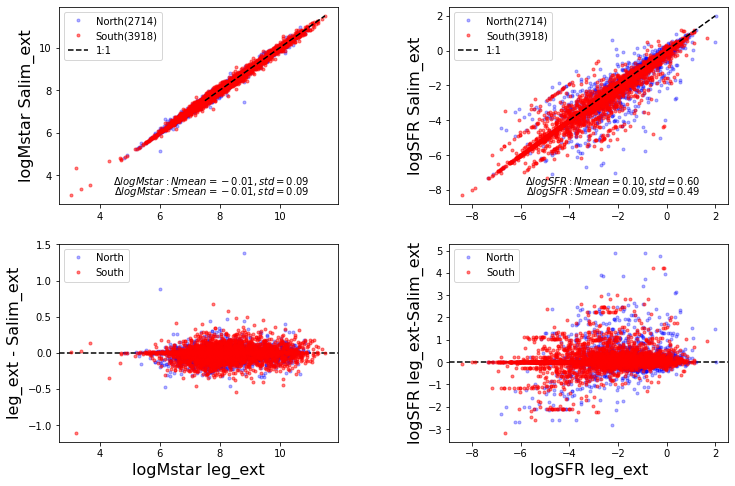

In [89]:
mptab1 = v.magphys_lext
mptab2 = v.magphys_sext
compare2magphys(mptab1,mptab2,mlabel1='leg_ext',mlabel2='Salim_ext')

# Comparing fluxes

In [66]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def plotapflux(table,index):
    bands = ['G','R','Z','W1','W2','W3','W4','NUV']#,'FUV']
    flux = []
    flux_err = []
    rad_grz = np.array([0.5, 0.75, 1.0, 1.5, 2.0, 3.5, 5.0, 7.0],'f')#arcsec
    rad_wise = rad_grz[3:]
    for b in bands:
        flux_key = 'APFLUX_'+b
        ivar_key = 'FLUX_IVAR_'+b
        flux = table[flux_key][index]
        flux_err = 1./np.sqrt(table[ivar_key][index])

        if (b.startswith('W') or b.startswith('NUV')):
            aps = rad_wise
        else:
            aps = rad_grz
        #print(len(flux),len(aps))
        #aps = aps*table[fwhm_key][i]
        plt.errorbar(aps,flux,yerr=flux_err,label=b,fmt='o-')
        plt.xlabel('Radius (arcsec)',fontsize=15)
        plt.ylabel('Flux (nmgy)',fontsize=15)
        

In [22]:
v.ephot.colnames

['VFID',
 'photFlag',
 'SGA_ID',
 'VF_ID',
 'GALAXY',
 'X0_MOMENT',
 'Y0_MOMENT',
 'RA_MOMENT',
 'DEC_MOMENT',
 'SMA_MOMENT',
 'PA_MOMENT',
 'BA_MOMENT',
 'SMA_FUV',
 'INTENS_FUV',
 'INTENS_ERR_FUV',
 'EPS_FUV',
 'EPS_ERR_FUV',
 'PA_FUV',
 'PA_ERR_FUV',
 'X0_FUV',
 'X0_ERR_FUV',
 'Y0_FUV',
 'Y0_ERR_FUV',
 'A3_FUV',
 'A3_ERR_FUV',
 'A4_FUV',
 'A4_ERR_FUV',
 'RMS_FUV',
 'PIX_STDDEV_FUV',
 'STOP_CODE_FUV',
 'NDATA_FUV',
 'NFLAG_FUV',
 'NITER_FUV',
 'SMA_NUV',
 'INTENS_NUV',
 'INTENS_ERR_NUV',
 'EPS_NUV',
 'EPS_ERR_NUV',
 'PA_NUV',
 'PA_ERR_NUV',
 'X0_NUV',
 'X0_ERR_NUV',
 'Y0_NUV',
 'Y0_ERR_NUV',
 'A3_NUV',
 'A3_ERR_NUV',
 'A4_NUV',
 'A4_ERR_NUV',
 'RMS_NUV',
 'PIX_STDDEV_NUV',
 'STOP_CODE_NUV',
 'NDATA_NUV',
 'NFLAG_NUV',
 'NITER_NUV',
 'SMA_SB22',
 'SMA_SB22.5',
 'SMA_SB23',
 'SMA_SB23.5',
 'SMA_SB24',
 'SMA_SB24.5',
 'SMA_SB25',
 'SMA_SB25.5',
 'SMA_SB26',
 'SMA_IVAR_SB22',
 'SMA_IVAR_SB22.5',
 'SMA_IVAR_SB23',
 'SMA_IVAR_SB23.5',
 'SMA_IVAR_SB24',
 'SMA_IVAR_SB24.5',
 'SMA_IVAR_SB25',

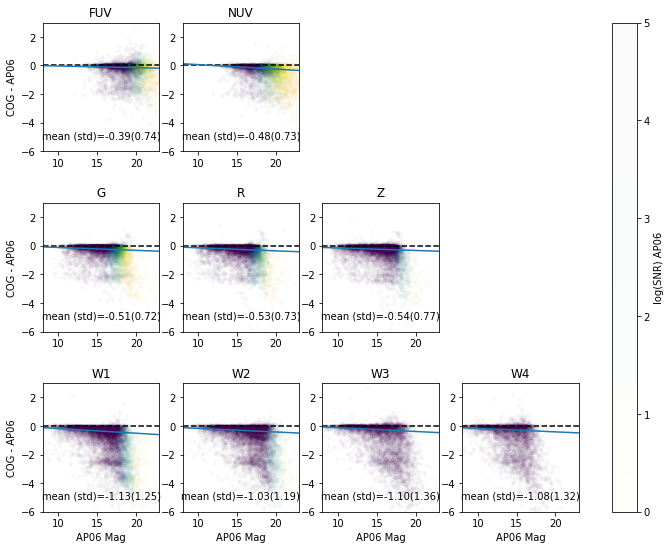

In [99]:
# plot COG vs AP06
plt.figure(figsize=(12,9))
plt.subplots_adjust(hspace=.4)
bands = ['FUV','NUV','G','R','Z','W1','W2','W3','W4']#,]
iplot = {'FUV':1,'NUV':2,'G':5,'R':6,'Z':7,'W1':9,'W2':10,'W3':11,'W4':12}
allax = []
for i,b in enumerate(bands):
    plt.subplot(3,4,iplot[b])
    x_key = 'FLUX_AP06_'+b
    err_key = 'FLUX_IVAR_AP06_'+b
    snr = np.abs(v.ephot[x_key]/v.ephot[err_key])
    y_key = 'COG_MTOT_'+b
    c_key = 'FRACMASKED_AP06_'+b
    apmag = 22.5-2.5*np.log10(v.ephot[x_key])
    err = v.ephot[x_key]
    dmag = v.ephot[y_key]-apmag
    
    flag = (v.ephot[x_key] > 0) & (v.ephot[y_key] > 0) & (v.ephot[c_key] < 0.1)
    fitflag = flag & (np.abs(dmag) < 1)
    
    plt.scatter(apmag,dmag,c=np.log(snr),vmin=0,vmax=5,s=10,alpha=.02,cmap='viridis_r')
    plt.ylim(-6,3)
    xmin,xmax = 8,23
    plt.xlim(xmin,xmax)
    xline = np.linspace(xmin,xmax,100)
    plt.plot(xline,np.zeros(len(xline)),'k--',)#label='1:1')
    

    Nmean = np.nanmean(dmag[flag])
    Nrms = np.nanstd(dmag[flag])
    plt.text(0.5,0.1,"mean (std)={:.2f}({:.2f})".format(Nmean,Nrms),fontsize=10,transform=plt.gca().transAxes,horizontalalignment="center")
    
    # fit a line
    fitflag = flag & (np.abs(dmag) < 1)
    c = np.polyfit(apmag[fitflag],dmag[fitflag],1)#,w=v.ephot[err_key][fitflag])
    yfit = np.polyval(c,xline)
    plt.plot(xline,yfit)
    if (i == 0) | (i == 2)| (i == 5):
        plt.ylabel("COG - AP06")
    if i > 4:
        plt.xlabel("AP06 Mag")
    plt.title(b)
    allax.append(plt.gca())
plt.colorbar(ax=allax,label='log(SNR) AP06')

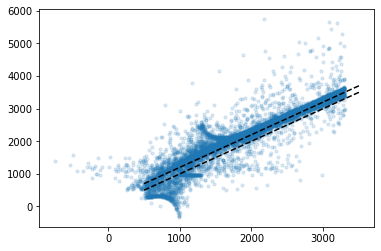

In [98]:
plt.figure()
plt.scatter(v.main['vr'],v.env['Vcosmic'],s=10,alpha=.15)
#plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
xline = np.linspace(500,3500)
plt.plot(xline,xline,'k--')
plt.plot(xline,xline+200,'k--')

# Running without zband
to see if offset b/w N and S goes away

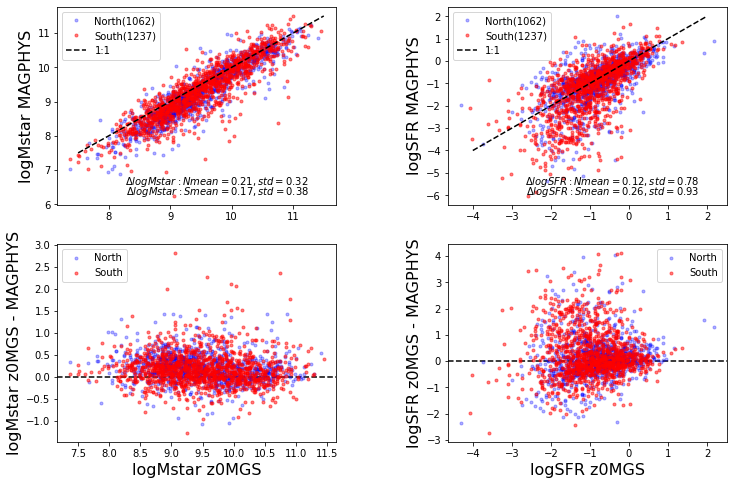

In [102]:
mptab = v.magphys_noz_lext
compare2z0mgs(mptab)

In [114]:
v.magphys.colnames

['VFID',
 'logSFR',
 'logSFR-med',
 'logSFR-68conf',
 'logMstar',
 'logMstar-med',
 'logMstar-68conf',
 'logsSFR',
 'logsSFR-med',
 'logsSFR-68conf',
 'chisq',
 'magphysFlag']

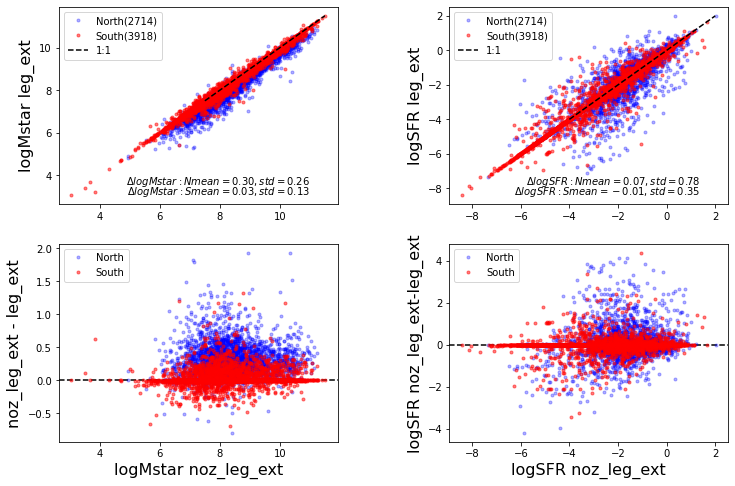

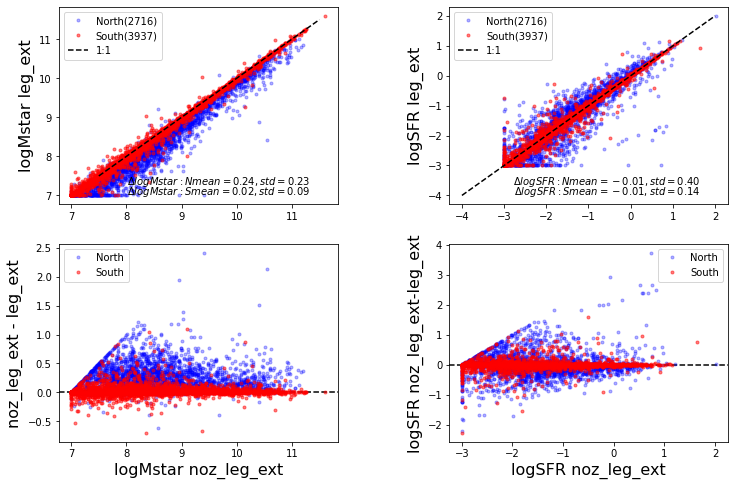

In [119]:
%run ~/github/Virgo/programs/readtablesv2.py
mptab1 = v.magphys_noz_lext
mptab2 = v.magphys_lext
compare2magphys(mptab1,mptab2,mlabel1='noz_leg_ext',mlabel2='leg_ext')
compare2magphys(mptab1,mptab2,mlabel1='noz_leg_ext',mlabel2='leg_ext',usemed=True)

# Solution

Construct a super set of magphys results

* legacy extinction w/zband for South
* legacy extinctoin w/out zband for North



In [104]:

Nflag = (v.main['DEC'] >= 32.375)
Sflag = (v.main['DEC'] < 32.375)


mpsuper = v.magphys_noz_lext
mpsuper[Sflag] = v.magphys_lext[Sflag]

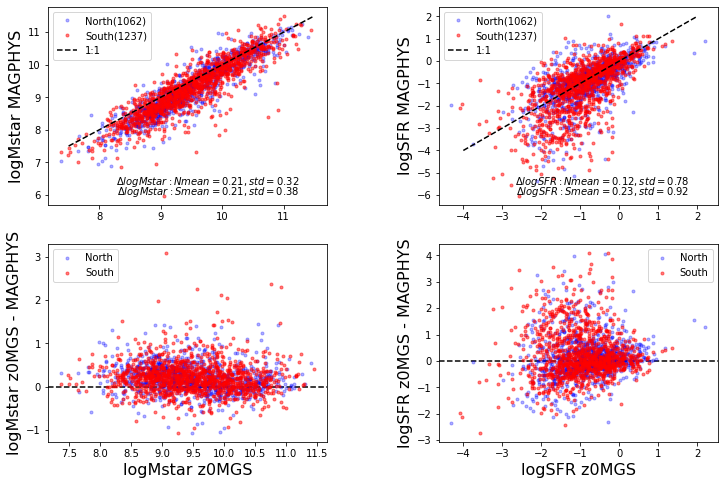

In [105]:
mptab = mpsuper
compare2z0mgs(mptab)

#  Updated readtablesv2.py to do this.

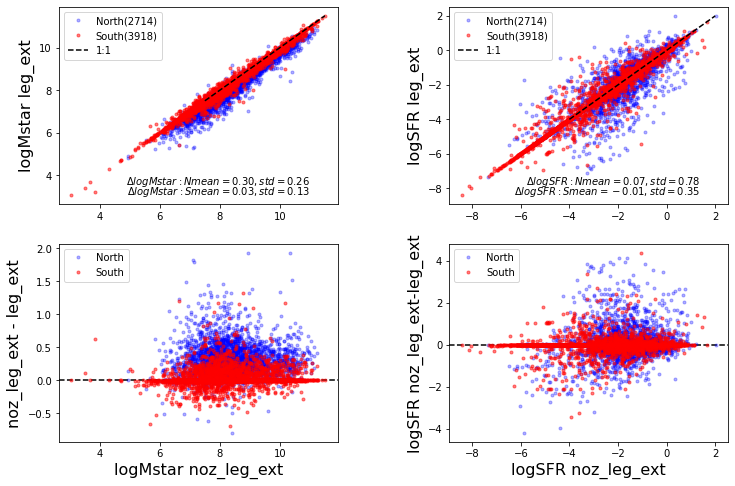

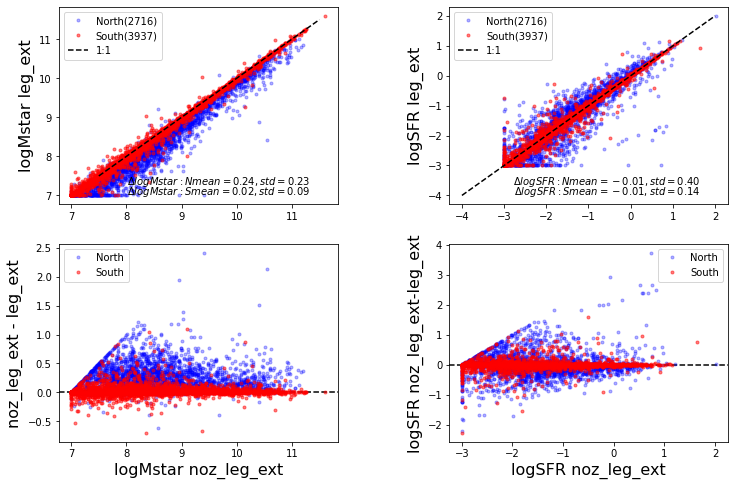

In [121]:
%run ~/github/Virgo/programs/readtablesv2.py
mptab1 = v.magphys_noz_lext
mptab2 = v.magphys_lext
compare2magphys(mptab1,mptab2,mlabel1='noz_leg_ext',mlabel2='leg_ext')
compare2magphys(mptab1,mptab2,mlabel1='noz_leg_ext',mlabel2='leg_ext',usemed=True)

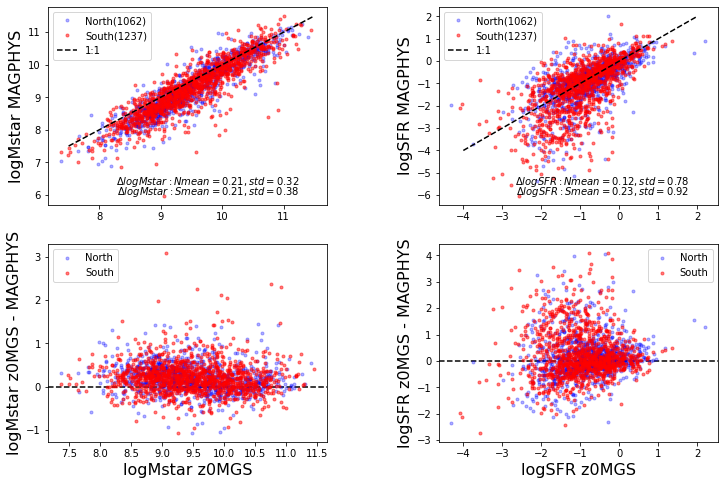

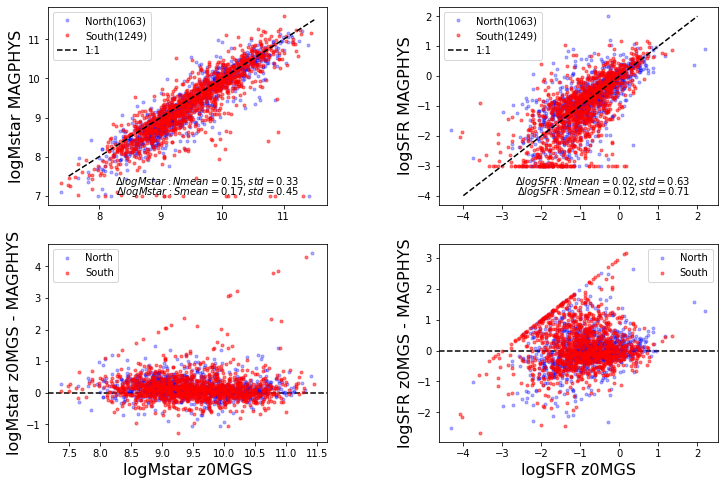

In [123]:
%run ~/github/Virgo/programs/readtablesv2.py

mptab = v.magphys
compare2z0mgs(mptab,mlabel='combz_leg_ext',)
compare2z0mgs(mptab,mlabel='combz_leg_ext',medflag=True)

Text(0.5, 1.0, 'Using median values')

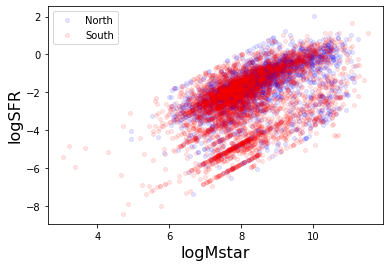

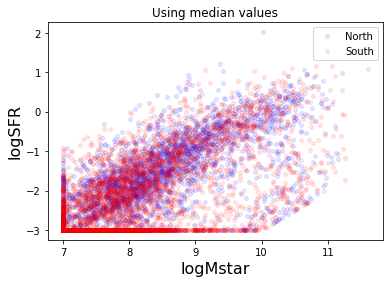

In [140]:
plt.figure(figsize=(6,4))
baseflag = v.magphys['logMstar'] > 0
flag = Nflag & baseflag
plt.plot(v.magphys['logMstar'][flag],v.magphys['logSFR'][flag],'bo',alpha=.1,markersize=4,label='North')

flag = Sflag & baseflag
plt.plot(v.magphys['logMstar'][flag],v.magphys['logSFR'][flag],'ro',alpha=.1,markersize=4,label='South')
plt.legend()
plt.ylabel('logSFR',fontsize=16)
plt.xlabel('logMstar',fontsize=16)

# using median values
plt.figure(figsize=(6,4))
baseflag = v.magphys['logMstar'] > 0
flag = Nflag & baseflag
plt.plot(v.magphys['logMstar-med'][flag],v.magphys['logSFR-med'][flag],'bo',alpha=.1,markersize=4,label='North')

flag = Sflag & baseflag
plt.plot(v.magphys['logMstar-med'][flag],v.magphys['logSFR-med'][flag],'ro',alpha=.1,markersize=4,label='South')
plt.legend()
plt.xlabel('logMstar',fontsize=16)
plt.ylabel('logSFR',fontsize=16)
plt.title("Using median values")

# Results from V3b photometry - Feb 2024

* JM found a bug in his code and reran the photometry
* I then reran magphys
* readtablesv2.py will now create a magphys table that uses no z-band results in the north, and all filters in the south.
* readtablesv2.py saves this merged table as
```
magphys_legacyExt_final.fits
```

* in readtablesv2.py, this table is self.magphys 


In [14]:
# Functions


Nflag = (v.main['DEC'] >= 32.375)
Sflag = (v.main['DEC'] < 32.375)

def compare2z0mgs_v3b(mptab,mlabel="magphys",medflag=False):
    """pass in magphys table to use when comparing to z0mgs"""
    plt.figure(figsize=(12,8))
    plt.subplots_adjust(wspace=.4)

    if medflag:
        masskey='logMstar_med'
        sfrkey='logSFR_med'
    else:
        masskey='logMstar_best'
        sfrkey='logSFR_best'
    flag = (mptab[masskey] > 0) & (v.z0mgs['logmass'] > 0) 
    plt.subplot(2,2,1)
    plt.plot(v.z0mgs['logmass'][flag & Nflag],mptab[masskey][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
    plt.plot(v.z0mgs['logmass'][flag & Sflag],mptab[masskey][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
    xline=np.linspace(7.5,11.5,50)

    plt.plot(xline,xline,'k--',label='1:1')
    #plt.axis([7.5,11.5,7.5,11.5])

    Nmean = np.mean(v.z0mgs['logmass'][flag & Nflag]-mptab[masskey][flag & Nflag])
    Nrms = np.std(v.z0mgs['logmass'][flag & Nflag]-mptab[masskey][flag & Nflag])
    plt.text(0.9,0.1,"$\Delta logMstar: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")



    Smean = np.mean(v.z0mgs['logmass'][flag & Sflag]-mptab[masskey][flag & Sflag])
    Srms = np.std(v.z0mgs['logmass'][flag & Sflag]-mptab[masskey][flag & Sflag])
    plt.text(0.9,0.05,"$\Delta logMstar: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")


    #plt.xlabel('logMstar z0MGS',fontsize=16)
    plt.ylabel('logMstar MAGPHYS',fontsize=16)
    plt.legend(loc='upper left')

    ###### RESIDUALS

    Ndelta = v.z0mgs['logmass'][flag & Nflag]-mptab[masskey][flag & Nflag]
    Sdelta = v.z0mgs['logmass'][flag & Sflag]-mptab[masskey][flag & Sflag]

    plt.subplot(2,2,3)
    plt.axhline(y=0,ls='--',c='k')
    plt.plot(v.z0mgs['logmass'][flag & Nflag],Ndelta,'b.',alpha=.3,label='North')
    plt.plot(v.z0mgs['logmass'][flag & Sflag],Sdelta,'r.',alpha=.5,label='South')

    plt.xlabel('logMstar z0MGS',fontsize=16)
    plt.ylabel('logMstar z0MGS - MAGPHYS',fontsize=16)

    plt.legend(loc='upper left')


    ####### SFRS


    plt.subplot(2,2,2)
    plt.plot(v.z0mgs['logsfr'][flag & Nflag],mptab[sfrkey][flag & Nflag],'b.',alpha=.3,label=f"North({np.sum(flag&Nflag)})")
    plt.plot(v.z0mgs['logsfr'][flag & Sflag],mptab[sfrkey][flag & Sflag],'r.',alpha=.5,label=f"South({np.sum(flag&Sflag)})")
    xline=np.linspace(-4,2,50)
    plt.plot(xline,xline,'k--',label='1:1')

    delta = v.z0mgs['logsfr']-mptab[sfrkey]
    Nmean = np.mean(delta[flag & Nflag])
    Nrms = np.std(delta[flag & Nflag])
    plt.text(0.9,0.1,"$\Delta logSFR: N mean={:.2f}, std={:.2f}$".format(Nmean,Nrms),transform=plt.gca().transAxes,horizontalalignment="right")


    Smean = np.mean(delta[flag & Sflag])
    Srms = np.std(delta[flag & Sflag])
    plt.text(0.9,0.05,"$\Delta logSFR: S mean={:.2f}, std={:.2f}$".format(Smean,Srms),transform=plt.gca().transAxes,horizontalalignment="right")

    #plt.xlabel('logSFR z0MGS',fontsize=16)
    plt.ylabel('logSFR MAGPHYS',fontsize=16)
    #plt.axis([-3,2.5,-3,2.5])
    plt.legend(loc='upper left')

    ###### RESIDUALS
    plt.subplot(2,2,4)
    plt.axhline(y=0,ls='--',color='k')
    plt.plot(v.z0mgs['logsfr'][flag & Nflag],delta[flag & Nflag],'b.',alpha=.3,label="North")
    plt.plot(v.z0mgs['logsfr'][flag & Sflag],delta[flag & Sflag],'r.',alpha=.5,label="South")
    plt.xlabel('logSFR z0MGS',fontsize=16)
    plt.ylabel('logSFR z0MGS - MAGPHYS',fontsize=16)
    plt.legend()

In [2]:
%run ~/github/Virgo/programs/readtablesv2.py

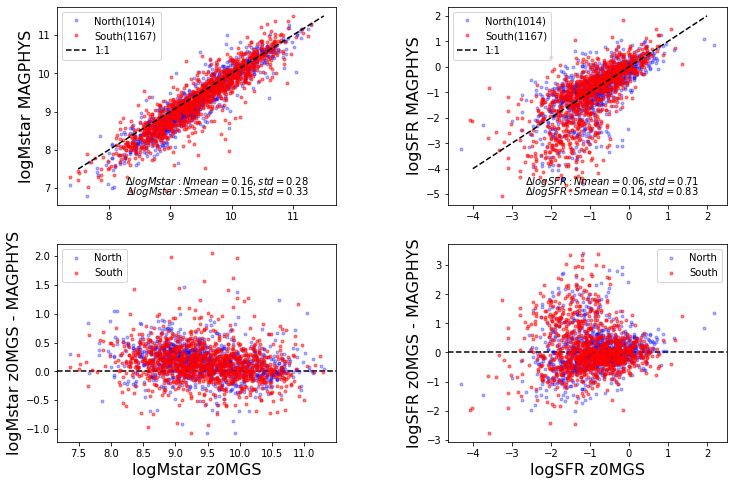

In [17]:
# compare magphys BEST values to z0MGS
%run ~/github/Virgo/programs/readtablesv2.py

mptab = v.magphys
compare2z0mgs_v3b(mptab,mlabel='combz_leg_ext')


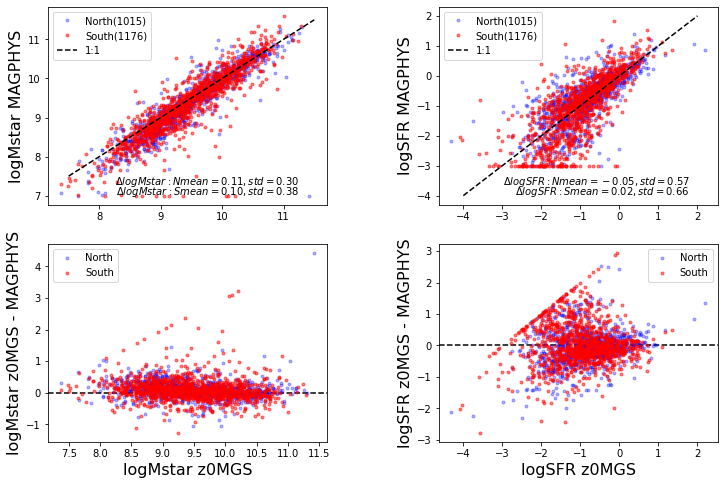

In [19]:
# compare magphys median values to z0MGS
%run ~/github/Virgo/programs/readtablesv2.py

mptab = v.magphys

compare2z0mgs_v3b(mptab,mlabel='combz_leg_ext',medflag=True)

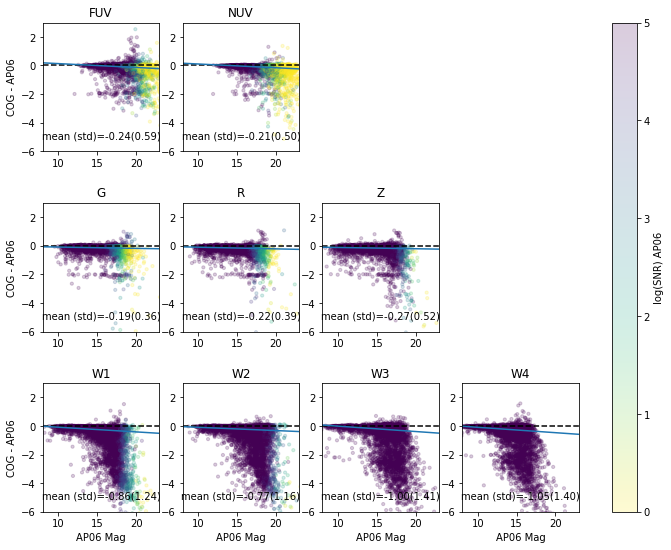

In [21]:
# plot COG vs AP06
plt.figure(figsize=(12,9))
plt.subplots_adjust(hspace=.4)
bands = ['FUV','NUV','G','R','Z','W1','W2','W3','W4']#,]
iplot = {'FUV':1,'NUV':2,'G':5,'R':6,'Z':7,'W1':9,'W2':10,'W3':11,'W4':12}
allax = []
for i,b in enumerate(bands):
    plt.subplot(3,4,iplot[b])
    x_key = 'FLUX_AP06_'+b
    err_key = 'FLUX_IVAR_AP06_'+b
    snr = np.abs(v.ephot[x_key]/v.ephot[err_key])
    y_key = 'COG_MTOT_'+b
    c_key = 'FRACMASKED_AP06_'+b
    apmag = 22.5-2.5*np.log10(v.ephot[x_key])
    err = v.ephot[x_key]
    dmag = v.ephot[y_key]-apmag
    
    flag = (v.ephot[x_key] > 0) & (v.ephot[y_key] > 0) & (v.ephot[c_key] < 0.1)
    fitflag = flag & (np.abs(dmag) < 1)
    
    plt.scatter(apmag,dmag,c=np.log(snr),vmin=0,vmax=5,s=10,alpha=.2,cmap='viridis_r')
    plt.ylim(-6,3)
    xmin,xmax = 8,23
    plt.xlim(xmin,xmax)
    xline = np.linspace(xmin,xmax,100)
    plt.plot(xline,np.zeros(len(xline)),'k--',)#label='1:1')
    

    Nmean = np.nanmean(dmag[flag])
    Nrms = np.nanstd(dmag[flag])
    plt.text(0.5,0.1,"mean (std)={:.2f}({:.2f})".format(Nmean,Nrms),fontsize=10,transform=plt.gca().transAxes,horizontalalignment="center")
    
    # fit a line
    fitflag = flag & (np.abs(dmag) < 1)
    c = np.polyfit(apmag[fitflag],dmag[fitflag],1)#,w=v.ephot[err_key][fitflag])
    yfit = np.polyval(c,xline)
    plt.plot(xline,yfit)
    if (i == 0) | (i == 2)| (i == 5):
        plt.ylabel("COG - AP06")
    if i > 4:
        plt.xlabel("AP06 Mag")
    plt.title(b)
    allax.append(plt.gca())
plt.colorbar(ax=allax,label='log(SNR) AP06')

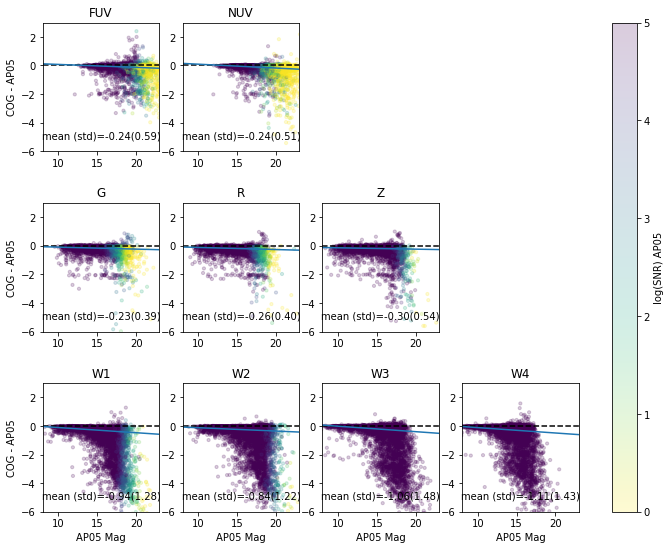

In [23]:
# plot COG vs AP06
plt.figure(figsize=(12,9))
plt.subplots_adjust(hspace=.4)
bands = ['FUV','NUV','G','R','Z','W1','W2','W3','W4']#,]
iplot = {'FUV':1,'NUV':2,'G':5,'R':6,'Z':7,'W1':9,'W2':10,'W3':11,'W4':12}
allax = []
for i,b in enumerate(bands):
    plt.subplot(3,4,iplot[b])
    x_key = 'FLUX_AP05_'+b
    err_key = 'FLUX_IVAR_AP05_'+b
    snr = np.abs(v.ephot[x_key]/v.ephot[err_key])
    y_key = 'COG_MTOT_'+b
    c_key = 'FRACMASKED_AP05_'+b
    apmag = 22.5-2.5*np.log10(v.ephot[x_key])
    err = v.ephot[x_key]
    dmag = v.ephot[y_key]-apmag
    
    flag = (v.ephot[x_key] > 0) & (v.ephot[y_key] > 0) & (v.ephot[c_key] < 0.1)
    fitflag = flag & (np.abs(dmag) < 1)
    
    plt.scatter(apmag,dmag,c=np.log(snr),vmin=0,vmax=5,s=10,alpha=.2,cmap='viridis_r')
    plt.ylim(-6,3)
    xmin,xmax = 8,23
    plt.xlim(xmin,xmax)
    xline = np.linspace(xmin,xmax,100)
    plt.plot(xline,np.zeros(len(xline)),'k--',)#label='1:1')
    

    Nmean = np.nanmean(dmag[flag])
    Nrms = np.nanstd(dmag[flag])
    plt.text(0.5,0.1,"mean (std)={:.2f}({:.2f})".format(Nmean,Nrms),fontsize=10,transform=plt.gca().transAxes,horizontalalignment="center")
    
    # fit a line
    fitflag = flag & (np.abs(dmag) < 1)
    c = np.polyfit(apmag[fitflag],dmag[fitflag],1)#,w=v.ephot[err_key][fitflag])
    yfit = np.polyval(c,xline)
    plt.plot(xline,yfit)
    if (i == 0) | (i == 2)| (i == 5):
        plt.ylabel("COG - AP05")
    if i > 4:
        plt.xlabel("AP05 Mag")
    plt.title(b)
    allax.append(plt.gca())
plt.colorbar(ax=allax,label='log(SNR) AP05')

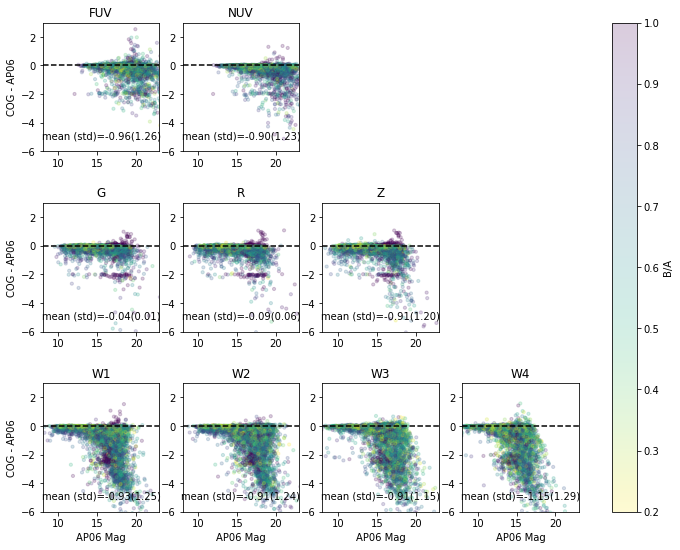

In [31]:
# plot COG vs AP06
plt.figure(figsize=(12,9))
plt.subplots_adjust(hspace=.4)
bands = ['FUV','NUV','G','R','Z','W1','W2','W3','W4']#,]
iplot = {'FUV':1,'NUV':2,'G':5,'R':6,'Z':7,'W1':9,'W2':10,'W3':11,'W4':12}
allax = []
for i,b in enumerate(bands):
    plt.subplot(3,4,iplot[b])
    x_key = 'FLUX_AP06_'+b
    err_key = 'FLUX_IVAR_AP06_'+b
    snr = np.abs(v.ephot[x_key]/v.ephot[err_key])
    y_key = 'COG_MTOT_'+b
    c_key = 'BA_MOMENT'
    apmag = 22.5-2.5*np.log10(v.ephot[x_key])
    err = v.ephot[x_key]
    dmag = v.ephot[y_key]-apmag
    
    flag = (v.ephot[x_key] > 0) & (v.ephot[y_key] > 0) & (v.ephot[c_key] < 0.1)
    fitflag = flag & (np.abs(dmag) < 1)
    plt.scatter(apmag,dmag,c=v.ephot[c_key],vmin=0.2,vmax=1,s=10,alpha=.2,cmap='viridis_r')
    plt.ylim(-6,3)
    xmin,xmax = 8,23
    plt.xlim(xmin,xmax)
    xline = np.linspace(xmin,xmax,100)
    plt.plot(xline,np.zeros(len(xline)),'k--',)#label='1:1')
    

    Nmean = np.nanmean(dmag[flag])
    Nrms = np.nanstd(dmag[flag])
    plt.text(0.5,0.1,"mean (std)={:.2f}({:.2f})".format(Nmean,Nrms),fontsize=10,transform=plt.gca().transAxes,horizontalalignment="center")
    
    # fit a line
    fitflag = flag & (np.abs(dmag) < 1)
    c = np.polyfit(apmag[fitflag],dmag[fitflag],1)#,w=v.ephot[err_key][fitflag])
    yfit = np.polyval(c,xline)
    #plt.plot(xline,yfit)
    if (i == 0) | (i == 2)| (i == 5):
        plt.ylabel("COG - AP06")
    if i > 4:
        plt.xlabel("AP06 Mag")
    plt.title(b)
    allax.append(plt.gca())
plt.colorbar(ax=allax,label='B/A')

# with new search grids and limits

updated some of the fitting parameters based on instructions from Elisabete.

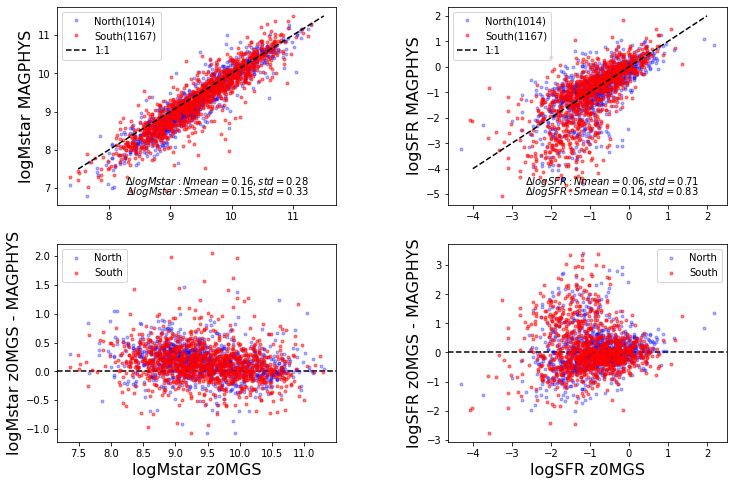

In [49]:
# compare magphys BEST values to z0MGS
%run ~/github/Virgo/programs/readtablesv2.py

mptab = v.magphys#[v.magphys['magphysFlag']]
compare2z0mgs_v3b(mptab,mlabel='combz_leg_ext')


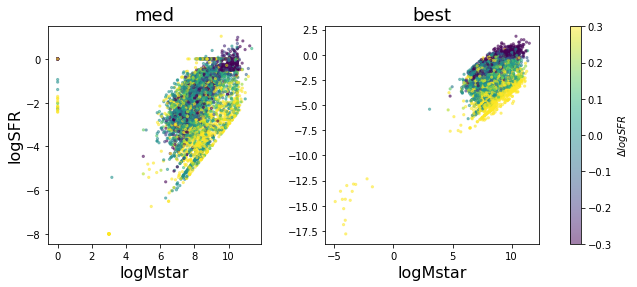

In [70]:
# compare magphys BEST values to z0MGS
%run ~/github/Virgo/programs/readtablesv2.py

flag = v.magphys['magphysFlag']
keys = ['_med','_best']
color = v.magphys['logMstar_best']
color = v.magphys['logMstar_med'] - v.magphys['logMstar_best']
color = v.magphys['logSFR_med'] - v.magphys['logSFR_best']
v1, v2 = -.3,.3
plt.figure(figsize=(11,4))
plt.subplots_adjust(wspace=.3)
allax = []
for i,k in enumerate(keys):
    plt.subplot(1,2,i+1)
    plt.scatter(v.magphys['logMstar'+k][flag],v.magphys['logSFR'+k][flag],alpha=.5,s=5,c=color[flag],vmin=v1,vmax=v2)
    plt.title(k.replace('_',''),fontsize=18)
    plt.xlabel("logMstar",fontsize=16)
    if i == 0:
        plt.ylabel("logSFR",fontsize=16)
    allax.append(plt.gca())
plt.colorbar(ax=allax,label='$\Delta logSFR$')

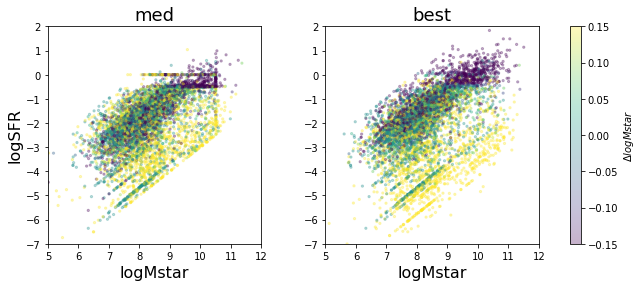

In [75]:
# compare magphys BEST values to z0MGS
%run ~/github/Virgo/programs/readtablesv2.py

flag = v.magphys['magphysFlag']
keys = ['_med','_best']
color = v.magphys['logMstar_best']
color = v.magphys['logMstar_med'] - v.magphys['logMstar_best']
color = v.magphys['logSFR_med'] - v.magphys['logSFR_best']
v1, v2 = -.15,.15
plt.figure(figsize=(11,4))
plt.subplots_adjust(wspace=.3)
allax = []
for i,k in enumerate(keys):
    plt.subplot(1,2,i+1)
    plt.scatter(v.magphys['logMstar'+k][flag],v.magphys['logSFR'+k][flag],alpha=.3,s=5,c=color[flag],vmin=v1,vmax=v2)
    plt.title(k.replace('_',''),fontsize=18)
    plt.xlabel("logMstar",fontsize=16)
    if i == 0:
        plt.ylabel("logSFR",fontsize=16)
    allax.append(plt.gca())
    plt.axis([5,12,-7,2])
plt.colorbar(ax=allax,label='$\Delta logMstar$')

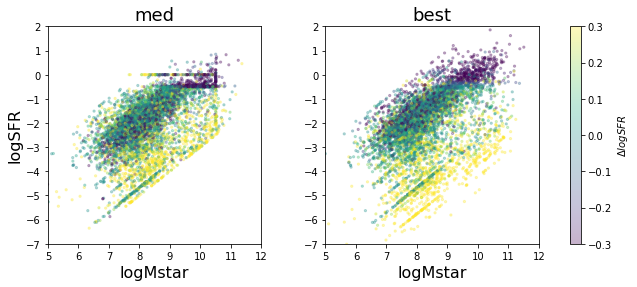

In [7]:
# compare magphys BEST values to z0MGS
%run ~/github/Virgo/programs/readtablesv2.py

flag = v.magphys['magphysFlag']
keys = ['_med','_best']
color = v.magphys['logMstar_best']
color = v.magphys['logMstar_med'] - v.magphys['logMstar_best']
color = v.magphys['logSFR_med'] - v.magphys['logSFR_best']
v1, v2 = -.3,.3
plt.figure(figsize=(11,4))
plt.subplots_adjust(wspace=.3)
allax = []
for i,k in enumerate(keys):
    plt.subplot(1,2,i+1)
    plt.scatter(v.magphys['logMstar'+k][flag],v.magphys['logSFR'+k][flag],alpha=.3,s=5,c=color[flag],vmin=v1,vmax=v2)
    plt.title(k.replace('_',''),fontsize=18)
    plt.xlabel("logMstar",fontsize=16)
    if i == 0:
        plt.ylabel("logSFR",fontsize=16)
    allax.append(plt.gca())
    plt.axis([5,12,-7,2])
plt.colorbar(ax=allax,label='$\Delta logSFR$')

In [78]:
np.sum(v.magphys['magphysFlag'])/len(v.main)

0.9564896755162242

In [1]:
from astropy.cosmology import WMAP9 as cosmo

In [2]:
cosmo.H0

<Quantity 69.32 km / (Mpc s)>

In [12]:
test=2**3+2**4
print(test & 2**0)
print(test & 2**1)
print(test & 2**2)
print(test & 2**3)
print(test & 2**4)
print(test & 2**5)

0
0
0
8
16
0


In [9]:
test & 2**4

16

In [16]:
%run ~/github/Virgo/programs/readtablesv2.py

In [17]:
test and 2**4

16

In [18]:
2**4 and test

24

In [19]:
test

24

In [20]:
2**4

16

# added saturation flags to ephot catalog - 2024-04-11

* we think some of the weird points in the magphys are weird b/c of saturation or the presence of a nearby star
* I added the relevant tractor flags to the ephot table so that we can test

In [9]:
%run ~/github/Virgo/programs/readtablesv2.py

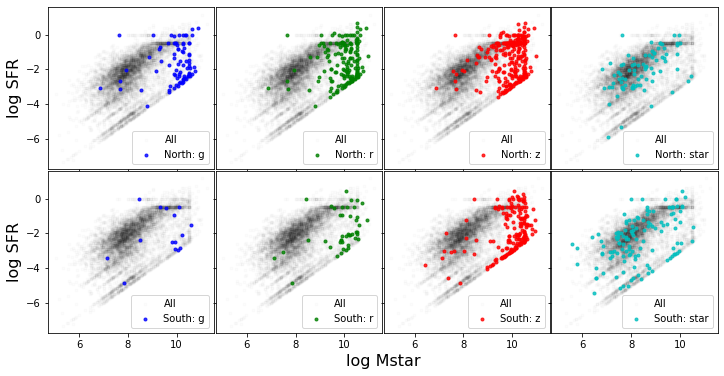

In [8]:

magflag = v.magphys['logMstar_med'] > 5



# overplot galaxies with saturation in at least one legacy band
satflags = [v.ephot['GSATURATE'],v.ephot['RSATURATE'], v.ephot['ZSATURATE'],v.ephot['NEARBYSTAR']]
colors = ['b','g','r','c']
labels = ['g','r','z','star']
decflag = v.main['DEC'] > 32.375
decflags = [decflag,~decflag]
t = plt.subplots(2,4,sharex=True,sharey=True,figsize=(12,6))
plt.subplots_adjust(hspace=.01,wspace=.01)
for i,satflag in enumerate(satflags):
    plt.sca(t[1][0][i])
    #plt.subplot(2,4,i+1)
    plt.plot(v.magphys['logMstar_med'][magflag],v.magphys['logSFR_med'][magflag],'k.',alpha=.01,label='All')
    flag = satflag & magflag & decflags[0]
    plt.plot(v.magphys['logMstar_med'][flag],v.magphys['logSFR_med'][flag],'r.',color=colors[i],label='North: '+labels[i],alpha=.8)
    plt.legend()
    if i == 0:
        plt.ylabel("log SFR",fontsize=16)

for i,satflag in enumerate(satflags):
    #plt.subplot(2,4,i+5)
    plt.sca(t[1][1][i])
    plt.plot(v.magphys['logMstar_med'][magflag],v.magphys['logSFR_med'][magflag],'k.',alpha=.01,label='All')
    flag = satflag & magflag & decflags[1]
    plt.plot(v.magphys['logMstar_med'][flag],v.magphys['logSFR_med'][flag],'r.',color=colors[i],label='South: '+labels[i],alpha=.8)
    plt.legend()
    if i == 0:
        plt.ylabel("log SFR",fontsize=16)
    if i == 2:
        plt.text(0,-.2,"log Mstar",transform=plt.gca().transAxes,fontsize=16,horizontalalignment='center')

# Testing larger errors

* I increased the floor on the legacy errors to 10%, and galex and wise to 13%.
* testing to see if the number of galaxies in the weird ridges changes.



Using April 25 catalogs with 5% errors

number of galaxies with logSFR_med = 0 is 363
number of galaxies with logSFR_med = 0 and NOT saturated is 336
number of galaxies with logSFR_med = -0.498 is 149
number of galaxies with logSFR_med = 0 and NOT saturated is 114


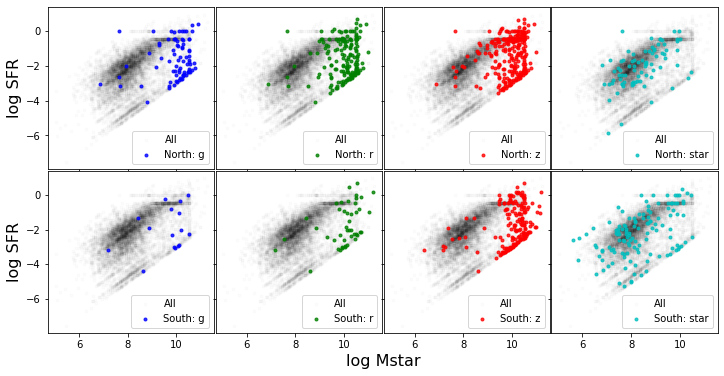

In [31]:
# with 10-13% errors
magflag = v.magphys['logMstar_med'] > 5


# overplot galaxies with saturation in at least one legacy band
satflags = [v.ephot['GSATURATE'],v.ephot['RSATURATE'], v.ephot['ZSATURATE'],v.ephot['NEARBYSTAR']]

#####################################################################
# calculate statistics for galaxies with weird SFRs
#####################################################################
print("\nUsing April 25 catalogs with 5% errors\n")
sfrflag = (v.magphys['logSFR_med'] == 0)
print(f"number of galaxies with logSFR_med = 0 is {np.sum(sfrflag)}")

for sat in satflags:
    sfrflag = sfrflag & ~sat
    
print(f"number of galaxies with logSFR_med = 0 and NOT saturated is {np.sum(sfrflag)}")



# create a flag to show galaxies with weird SFRs
sfrflag2 = (v.magphys['logSFR_med'] == -0.498)
print(f"number of galaxies with logSFR_med = -0.498 is {np.sum(sfrflag2)}")

for sat in satflags:
    sfrflag2 = sfrflag2 & ~sat
    
print(f"number of galaxies with logSFR_med = 0 and NOT saturated is {np.sum(sfrflag2)}")
#####################################################################

# plot parameters
colors = ['b','g','r','c']
labels = ['g','r','z','star']
decflag = v.main['DEC'] > 32.375
decflags = [decflag,~decflag]
t = plt.subplots(2,4,sharex=True,sharey=True,figsize=(12,6))
plt.subplots_adjust(hspace=.01,wspace=.01)
for i,satflag in enumerate(satflags):
    plt.sca(t[1][0][i])
    #plt.subplot(2,4,i+1)
    plt.plot(v.magphys['logMstar_med'][magflag],v.magphys['logSFR_med'][magflag],'k.',alpha=.01,label='All')
    flag = satflag & magflag & decflags[0]
    plt.plot(v.magphys['logMstar_med'][flag],v.magphys['logSFR_med'][flag],'r.',color=colors[i],label='North: '+labels[i],alpha=.8)
    plt.legend()
    if i == 0:
        plt.ylabel("log SFR",fontsize=16)

for i,satflag in enumerate(satflags):
    #plt.subplot(2,4,i+5)
    plt.sca(t[1][1][i])
    plt.plot(v.magphys['logMstar_med'][magflag],v.magphys['logSFR_med'][magflag],'k.',alpha=.01,label='All')
    flag = satflag & magflag & decflags[1]
    plt.plot(v.magphys['logMstar_med'][flag],v.magphys['logSFR_med'][flag],'r.',color=colors[i],label='South: '+labels[i],alpha=.8)
    plt.legend()
    if i == 0:
        plt.ylabel("log SFR",fontsize=16)
    if i == 2:
        plt.text(0,-.2,"log Mstar",transform=plt.gca().transAxes,fontsize=16,horizontalalignment='center')


Using April 18 catalogs with 5% errors

number of galaxies with logSFR_med = 0 is 363
number of galaxies with logSFR_med = 0 and NOT saturated is 336
number of galaxies with logSFR_med = -0.498 is 149
number of galaxies with logSFR_med = 0 and NOT saturated is 114


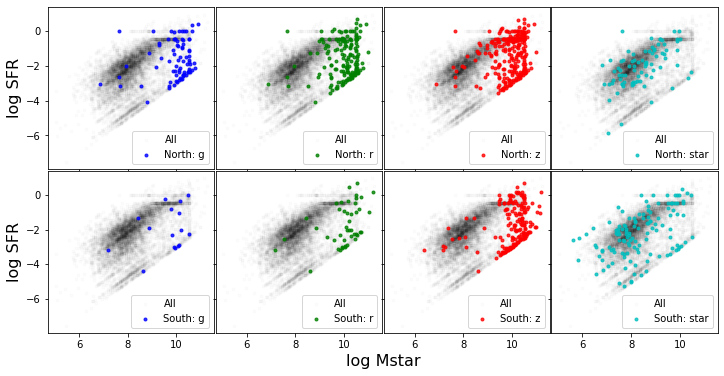

In [30]:
# april 18 2024 magphys tables
%run ~/github/Virgo/programs/readtablesv2.py

# with 10-13% errors
magflag = v.magphys['logMstar_med'] > 5



# overplot galaxies with saturation in at least one legacy band
satflags = [v.ephot['GSATURATE'],v.ephot['RSATURATE'], v.ephot['ZSATURATE'],v.ephot['NEARBYSTAR']]


#####################################################################
# calculate statistics for galaxies with weird SFRs
#####################################################################

print("\nUsing April 18 catalogs with 5% errors\n")
sfrflag = (v.magphys['logSFR_med'] == 0)
print(f"number of galaxies with logSFR_med = 0 is {np.sum(sfrflag)}")

for sat in satflags:
    sfrflag = sfrflag & ~sat
    
print(f"number of galaxies with logSFR_med = 0 and NOT saturated is {np.sum(sfrflag)}")



# create a flag to show galaxies with weird SFRs
sfrflag2 = (v.magphys['logSFR_med'] == -0.498)
print(f"number of galaxies with logSFR_med = -0.498 is {np.sum(sfrflag2)}")

for sat in satflags:
    sfrflag2 = sfrflag2 & ~sat
    
print(f"number of galaxies with logSFR_med = 0 and NOT saturated is {np.sum(sfrflag2)}")
#####################################################################

colors = ['b','g','r','c']
labels = ['g','r','z','star']
decflag = v.main['DEC'] > 32.375
decflags = [decflag,~decflag]
t = plt.subplots(2,4,sharex=True,sharey=True,figsize=(12,6))
plt.subplots_adjust(hspace=.01,wspace=.01)
for i,satflag in enumerate(satflags):
    plt.sca(t[1][0][i])
    #plt.subplot(2,4,i+1)
    plt.plot(v.magphys['logMstar_med'][magflag],v.magphys['logSFR_med'][magflag],'k.',alpha=.01,label='All')
    flag = satflag & magflag & decflags[0]
    plt.plot(v.magphys['logMstar_med'][flag],v.magphys['logSFR_med'][flag],'r.',color=colors[i],label='North: '+labels[i],alpha=.8)
    plt.legend()
    if i == 0:
        plt.ylabel("log SFR",fontsize=16)

for i,satflag in enumerate(satflags):
    #plt.subplot(2,4,i+5)
    plt.sca(t[1][1][i])
    plt.plot(v.magphys['logMstar_med'][magflag],v.magphys['logSFR_med'][magflag],'k.',alpha=.01,label='All')
    flag = satflag & magflag & decflags[1]
    plt.plot(v.magphys['logMstar_med'][flag],v.magphys['logSFR_med'][flag],'r.',color=colors[i],label='South: '+labels[i],alpha=.8)
    plt.legend()
    if i == 0:
        plt.ylabel("log SFR",fontsize=16)
    if i == 2:
        plt.text(0,-.2,"log Mstar",transform=plt.gca().transAxes,fontsize=16,horizontalalignment='center')

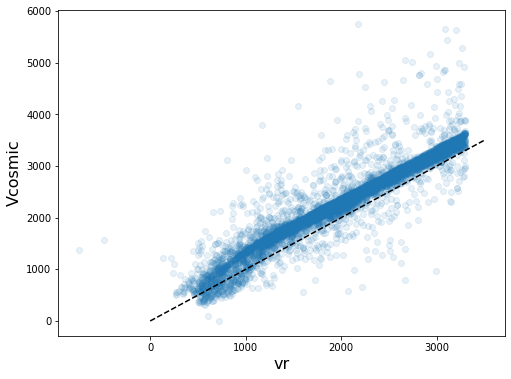

In [25]:
plt.figure(figsize=(8,6))
#plt.scatter(v.main['vr'],v.env['Vcosmic'],alpha=.1)
flag = v.env['cluster_member']
#plt.scatter(v.main['vr'][flag],v.env['Vcosmic'][flag],s=50,alpha=.1)

plt.scatter(v.main['vr'][~flag],v.env['Vcosmic'][~flag],alpha=.1)
plt.xlabel('vr',fontsize=16)
plt.ylabel('Vcosmic',fontsize=16)
xline = np.linspace(0,3500,100)
plt.plot(xline,xline,'k--')

logMstar_corrected = 

correction_factor = 

In [23]:
v.env.colnames

['VFID',
 'DM',
 'SGX',
 'SGY',
 'SGZ',
 'nCI08',
 'nCI08_err',
 'distSGX_Virgo',
 'distSGY_Virgo',
 'distSGZ_Virgo',
 'n5th_2D',
 'n5th_2D_err',
 'n5th',
 'n5th_err',
 'Vcosmic',
 'Vmodel',
 'Vmedian',
 'poor_group_memb',
 'rich_group_memb',
 'pure_field',
 'nearest_filament_dist_2D',
 'nearest_filament_dist_3D',
 'filament',
 'filament_PA',
 'orientation_wrt_filament',
 'filament_member',
 'mem_phase_space',
 'cluster_member',
 'mem_Mould00',
 'sep_degree']

# How much flux are we missing in AP06

number with good phot = 1963
FUV: number of good points = 1245
NUV: number of good points = 1400
G: number of good points = 1603
R: number of good points = 1597
Z: number of good points = 1600
W1: number of good points = 1521
W2: number of good points = 1486
W3: number of good points = 1168
W4: number of good points = 1023


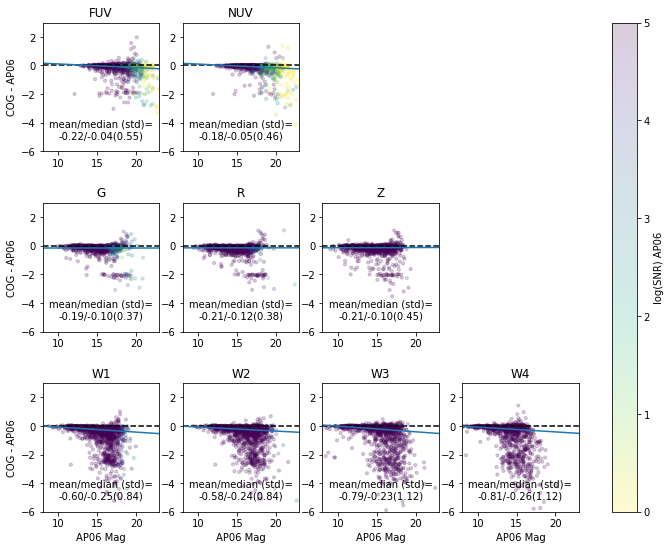

In [27]:
# plot COG vs AP06

# also remove galaxies that have saturation flag or nearby star flag
plt.figure(figsize=(12,9))
plt.subplots_adjust(hspace=.4)
bands = ['FUV','NUV','G','R','Z','W1','W2','W3','W4']#,]
iplot = {'FUV':1,'NUV':2,'G':5,'R':6,'Z':7,'W1':9,'W2':10,'W3':11,'W4':12}
allax = []

badphot_flag = v.ephot['GSATURATE'] |  v.ephot['RSATURATE'] |  v.ephot['ZSATURATE'] |  v.ephot['NEARBYSTAR']

badphot_flag = badphot_flag | (v.ephot['FRACMASKED_AP06_R'] < 0.01)

goodphot = ~badphot_flag
print(f"number with good phot = {np.sum(goodphot)}")
for i,b in enumerate(bands):
    plt.subplot(3,4,iplot[b])
    x_key = 'FLUX_AP06_'+b
    err_key = 'FLUX_IVAR_AP06_'+b
    snr = np.abs(v.ephot[x_key]/v.ephot[err_key])
    y_key = 'COG_MTOT_'+b
    c_key = 'FRACMASKED_AP06_'+b
    apmag = 22.5-2.5*np.log10(v.ephot[x_key])
    err = v.ephot[x_key]
    dmag = v.ephot[y_key]-apmag
    
    flag = (v.ephot[x_key] > 0) & (v.ephot[y_key] > 0) & (v.ephot[c_key] < 0.1)& goodphot
    print(f"{b}: number of good points = {np.sum(flag)}")
    fitflag = flag & (np.abs(dmag) < 1)
    
    plt.scatter(apmag[flag],dmag[flag],c=np.log(snr)[flag],vmin=0,vmax=5,s=10,alpha=.2,cmap='viridis_r')
    plt.ylim(-6,3)
    xmin,xmax = 8,23
    plt.xlim(xmin,xmax)
    xline = np.linspace(xmin,xmax,100)
    plt.plot(xline,np.zeros(len(xline)),'k--',)#label='1:1')
    

    Nmean = np.nanmean(dmag[flag ])
    
    Nmed = np.nanmedian(dmag[flag ])
    Nrms = np.nanstd(dmag[flag])
    plt.text(0.5,0.1,f"mean/median (std)=\n{Nmean:.2f}/{Nmed:.2f}({Nrms:.2f})",fontsize=10,transform=plt.gca().transAxes,horizontalalignment="center")
    
    # fit a line
    fitflag = flag & (np.abs(dmag) < 1)
    c = np.polyfit(apmag[fitflag],dmag[fitflag],1)#,w=v.ephot[err_key][fitflag])
    yfit = np.polyval(c,xline)
    plt.plot(xline,yfit)
    if (i == 0) | (i == 2)| (i == 5):
        plt.ylabel("COG - AP06")
    if i > 4:
        plt.xlabel("AP06 Mag")
    plt.title(b)
    allax.append(plt.gca())
plt.colorbar(ax=allax,label='log(SNR) AP06')

(array([6.217e+03, 3.120e+02, 1.280e+02, 4.300e+01, 3.100e+01, 2.900e+01,
        8.000e+00, 4.000e+00, 2.000e+00, 6.000e+00]),
 array([0.        , 0.09724205, 0.1944841 , 0.29172614, 0.3889682 ,
        0.48621026, 0.5834523 , 0.68069434, 0.7779364 , 0.87517846,
        0.9724205 ], dtype=float32),
 <BarContainer object of 10 artists>)

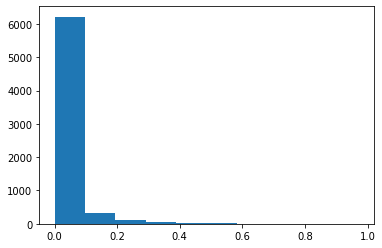

In [9]:
plt.hist(v.ephot['FRACMASKED_AP06_R'])

# Moving toward a final set of stellar masses

* need to convert from Vr to Vcosmic
* need to make sure we are using flags properly



In [28]:
%run ~/github/Virgo/programs/readtablesv2.py

In [30]:
v.ephot.colnames

['VFID',
 'photFlag',
 'SGA_ID',
 'VF_ID',
 'GALAXY',
 'X0_MOMENT',
 'Y0_MOMENT',
 'RA_MOMENT',
 'DEC_MOMENT',
 'SMA_MOMENT',
 'PA_MOMENT',
 'BA_MOMENT',
 'SMA_SB22',
 'SMA_SB22.5',
 'SMA_SB23',
 'SMA_SB23.5',
 'SMA_SB24',
 'SMA_SB24.5',
 'SMA_SB25',
 'SMA_SB25.5',
 'SMA_SB26',
 'SMA_IVAR_SB22',
 'SMA_IVAR_SB22.5',
 'SMA_IVAR_SB23',
 'SMA_IVAR_SB23.5',
 'SMA_IVAR_SB24',
 'SMA_IVAR_SB24.5',
 'SMA_IVAR_SB25',
 'SMA_IVAR_SB25.5',
 'SMA_IVAR_SB26',
 'FLUX_SB22_G',
 'FLUX_SB22.5_G',
 'FLUX_SB23_G',
 'FLUX_SB23.5_G',
 'FLUX_SB24_G',
 'FLUX_SB24.5_G',
 'FLUX_SB25_G',
 'FLUX_SB25.5_G',
 'FLUX_SB26_G',
 'FLUX_IVAR_SB22_G',
 'FLUX_IVAR_SB22.5_G',
 'FLUX_IVAR_SB23_G',
 'FLUX_IVAR_SB23.5_G',
 'FLUX_IVAR_SB24_G',
 'FLUX_IVAR_SB24.5_G',
 'FLUX_IVAR_SB25_G',
 'FLUX_IVAR_SB25.5_G',
 'FLUX_IVAR_SB26_G',
 'FRACMASKED_SB22_G',
 'FRACMASKED_SB22.5_G',
 'FRACMASKED_SB23_G',
 'FRACMASKED_SB23.5_G',
 'FRACMASKED_SB24_G',
 'FRACMASKED_SB24.5_G',
 'FRACMASKED_SB25_G',
 'FRACMASKED_SB25.5_G',
 'FRACMASKED_SB26_

In [32]:
goodflag = ~v.ephot['BRIGHTSTAR'] & ~v.ephot['MEDIUMSTAR'] & ~v.ephot['GSATURATE'] & ~v.ephot['RSATURATE'] & ~v.ephot['ZSATURATE'] & ~v.ephot['WISEM1'] & ~v.ephot['WISEM2']



In [39]:
goodflag = goodflag & (v.ephot['WISEMASK_W1'] == 0) & (v.ephot['WISEMASK_W2'] == 0) & (v.magphys['logMstar_med'] > 0.1)

In [40]:
np.sum(goodflag)/len(goodflag)

0.8448377581120944

(8.0, 11.0, -1.0, 0.1)

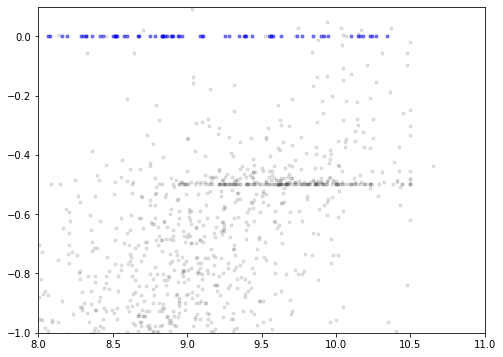

In [50]:
# check SFR-mstar
%matplotlib inline
x = v.magphys['logMstar_med']
y = v.magphys['logSFR_med']
plt.figure(figsize=(8,6))
plt.plot(x[goodflag],y[goodflag],'k.',alpha=.1)


badflag = y == 0
plt.plot(x[goodflag & badflag],y[goodflag & badflag],'b.',alpha=.4)


#badflag = y == -.498
#plt.plot(x[goodflag & badflag],y[goodflag & badflag],'r.',alpha=.4)
plt.axis([8,11,-1,.1])

In [54]:
v.main['prefix','objname'][goodflag & badflag]

<Table length=64>
              prefix                      objname        
             bytes36                      bytes28        
--------------------------------- -----------------------
                VFID0027-UGC05689                UGC05689
             VFID0042-KUG0823+737               PGC023809
                  VFID0709-VV118d               PGC035325
                 VFID0764-NGC3225                 NGC3225
                 VFID0815-NGC5526                 NGC5526
                 VFID0899-NGC3206                 NGC3206
                VFID0932-UGC06816                UGC06816
                VFID1192-UGC04879                      --
 VFID1196-SDSSJ112100.11+524330.1 SDSSJ112100.11+524330.1
                VFID1335-UGC09083                UGC09083
                              ...                     ...
                VFID6097-UGC08263                UGC08263
             VFID6129-CGCG032-017               PGC023540
 VFID6194-SDSSJ143958.22+024451.9              PGC1236341
                VFID6209-UGC05539                UGC05539
                VFID6241-UGC06345                UGC06345
                VFID6358-UGC08521                UGC08521
VFID6524-WISEAJ153928.73+005636.8              PGC1179805
                VFID6637-UGC09299                UGC09299
                 VFID6683-NGC5733                 NGC5733
                 VFID6763-NGC5496                 NGC5496

### Visual inspection

VFID0027-UGC05689

In [52]:
v.ephot[27]

<Row index=27>
  VFID   photFlag SGA_ID VF_ID  GALAXY  X0_MOMENT Y0_MOMENT     RA_MOMENT         DEC_MOMENT    SMA_MOMENT PA_MOMENT BA_MOMENT   SMA_SB22 SMA_SB22.5  SMA_SB23 SMA_SB23.5 SMA_SB24 SMA_SB24.5 SMA_SB25 SMA_SB25.5 SMA_SB26 SMA_IVAR_SB22 SMA_IVAR_SB22.5 SMA_IVAR_SB23 SMA_IVAR_SB23.5 SMA_IVAR_SB24 SMA_IVAR_SB24.5 SMA_IVAR_SB25 SMA_IVAR_SB25.5 SMA_IVAR_SB26 FLUX_SB22_G FLUX_SB22.5_G FLUX_SB23_G FLUX_SB23.5_G FLUX_SB24_G FLUX_SB24.5_G FLUX_SB25_G FLUX_SB25.5_G FLUX_SB26_G FLUX_IVAR_SB22_G FLUX_IVAR_SB22.5_G FLUX_IVAR_SB23_G FLUX_IVAR_SB23.5_G FLUX_IVAR_SB24_G FLUX_IVAR_SB24.5_G FLUX_IVAR_SB25_G FLUX_IVAR_SB25.5_G FLUX_IVAR_SB26_G FRACMASKED_SB22_G FRACMASKED_SB22.5_G FRACMASKED_SB23_G FRACMASKED_SB23.5_G FRACMASKED_SB24_G FRACMASKED_SB24.5_G FRACMASKED_SB25_G FRACMASKED_SB25.5_G FRACMASKED_SB26_G FLUX_SB22_R FLUX_SB22.5_R FLUX_SB23_R FLUX_SB23.5_R FLUX_SB24_R FLUX_SB24.5_R FLUX_SB25_R FLUX_SB25.5_R FLUX_SB26_R FLUX_IVAR_SB22_R FLUX_IVAR_SB22.5_R FLUX_IVAR_SB23_R FLUX_IVAR_SB23.5_R FLUX_IVAR_SB24_R FLUX_IVAR_SB24.5_R FLUX_IVAR_SB25_R FLUX_IVAR_SB25.5_R FLUX_IVAR_SB26_R FRACMASKED_SB22_R FRACMASKED_SB22.5_R FRACMASKED_SB23_R FRACMASKED_SB23.5_R FRACMASKED_SB24_R FRACMASKED_SB24.5_R FRACMASKED_SB25_R FRACMASKED_SB25.5_R FRACMASKED_SB26_R FLUX_SB22_Z FLUX_SB22.5_Z FLUX_SB23_Z FLUX_SB23.5_Z FLUX_SB24_Z FLUX_SB24.5_Z FLUX_SB25_Z FLUX_SB25.5_Z FLUX_SB26_Z FLUX_IVAR_SB22_Z FLUX_IVAR_SB22.5_Z FLUX_IVAR_SB23_Z FLUX_IVAR_SB23.5_Z FLUX_IVAR_SB24_Z FLUX_IVAR_SB24.5_Z FLUX_IVAR_SB25_Z FLUX_IVAR_SB25.5_Z FLUX_IVAR_SB26_Z FRACMASKED_SB22_Z FRACMASKED_SB22.5_Z FRACMASKED_SB23_Z FRACMASKED_SB23.5_Z FRACMASKED_SB24_Z FRACMASKED_SB24.5_Z FRACMASKED_SB25_Z FRACMASKED_SB25.5_Z FRACMASKED_SB26_Z FLUX_SB22_FUV FLUX_SB22.5_FUV FLUX_SB23_FUV FLUX_SB23.5_FUV FLUX_SB24_FUV FLUX_SB24.5_FUV FLUX_SB25_FUV FLUX_SB25.5_FUV FLUX_SB26_FUV FLUX_IVAR_SB22_FUV FLUX_IVAR_SB22.5_FUV FLUX_IVAR_SB23_FUV FLUX_IVAR_SB23.5_FUV FLUX_IVAR_SB24_FUV FLUX_IVAR_SB24.5_FUV FLUX_IVAR_SB25_FUV FLUX_IVAR_SB25.5_FUV FLUX_IVAR_SB26_FUV FRACMASKED_SB22_FUV FRACMASKED_SB22.5_FUV FRACMASKED_SB23_FUV FRACMASKED_SB23.5_FUV FRACMASKED_SB24_FUV FRACMASKED_SB24.5_FUV FRACMASKED_SB25_FUV FRACMASKED_SB25.5_FUV FRACMASKED_SB26_FUV FLUX_SB22_NUV FLUX_SB22.5_NUV FLUX_SB23_NUV FLUX_SB23.5_NUV FLUX_SB24_NUV FLUX_SB24.5_NUV FLUX_SB25_NUV FLUX_SB25.5_NUV FLUX_SB26_NUV FLUX_IVAR_SB22_NUV FLUX_IVAR_SB22.5_NUV FLUX_IVAR_SB23_NUV FLUX_IVAR_SB23.5_NUV FLUX_IVAR_SB24_NUV FLUX_IVAR_SB24.5_NUV FLUX_IVAR_SB25_NUV FLUX_IVAR_SB25.5_NUV FLUX_IVAR_SB26_NUV FRACMASKED_SB22_NUV FRACMASKED_SB22.5_NUV FRACMASKED_SB23_NUV FRACMASKED_SB23.5_NUV FRACMASKED_SB24_NUV FRACMASKED_SB24.5_NUV FRACMASKED_SB25_NUV FRACMASKED_SB25.5_NUV FRACMASKED_SB26_NUV FLUX_SB22_W1 FLUX_SB22.5_W1 FLUX_SB23_W1 FLUX_SB23.5_W1 FLUX_SB24_W1 FLUX_SB24.5_W1 FLUX_SB25_W1 FLUX_SB25.5_W1 FLUX_SB26_W1 FLUX_IVAR_SB22_W1 FLUX_IVAR_SB22.5_W1 FLUX_IVAR_SB23_W1 FLUX_IVAR_SB23.5_W1 FLUX_IVAR_SB24_W1 FLUX_IVAR_SB24.5_W1 FLUX_IVAR_SB25_W1 FLUX_IVAR_SB25.5_W1 FLUX_IVAR_SB26_W1 FRACMASKED_SB22_W1 FRACMASKED_SB22.5_W1 FRACMASKED_SB23_W1 FRACMASKED_SB23.5_W1 FRACMASKED_SB24_W1 FRACMASKED_SB24.5_W1 FRACMASKED_SB25_W1 FRACMASKED_SB25.5_W1 FRACMASKED_SB26_W1 FLUX_SB22_W2 FLUX_SB22.5_W2 FLUX_SB23_W2 FLUX_SB23.5_W2 FLUX_SB24_W2 FLUX_SB24.5_W2 FLUX_SB25_W2 FLUX_SB25.5_W2 FLUX_SB26_W2 FLUX_IVAR_SB22_W2 FLUX_IVAR_SB22.5_W2 FLUX_IVAR_SB23_W2 FLUX_IVAR_SB23.5_W2 FLUX_IVAR_SB24_W2 FLUX_IVAR_SB24.5_W2 FLUX_IVAR_SB25_W2 FLUX_IVAR_SB25.5_W2 FLUX_IVAR_SB26_W2 FRACMASKED_SB22_W2 FRACMASKED_SB22.5_W2 FRACMASKED_SB23_W2 FRACMASKED_SB23.5_W2 FRACMASKED_SB24_W2 FRACMASKED_SB24.5_W2 FRACMASKED_SB25_W2 FRACMASKED_SB25.5_W2 FRACMASKED_SB26_W2 FLUX_SB22_W3 FLUX_SB22.5_W3 FLUX_SB23_W3 FLUX_SB23.5_W3 FLUX_SB24_W3 FLUX_SB24.5_W3 FLUX_SB25_W3 FLUX_SB25.5_W3 FLUX_SB26_W3 FLUX_IVAR_SB22_W3 FLUX_IVAR_SB22.5_W3 FLUX_IVAR_SB23_W3 FLUX_IVAR_SB23.5_W3 FLUX_IVAR_SB24_W3 FLUX_IVAR_SB24.5_W3 FLUX_IVAR_SB25_W3 FLUX_IVAR_SB25.5_W3 FLUX_IVAR_SB26_W3 FRACMASKED_SB22_W3 FRACMASKED_SB22.5_W3 FRACMA

In [55]:
v.ephot[709]

<Row index=709>
  VFID   photFlag  SGA_ID VF_ID   GALAXY  X0_MOMENT Y0_MOMENT     RA_MOMENT          DEC_MOMENT    SMA_MOMENT PA_MOMENT BA_MOMENT SMA_SB22 SMA_SB22.5  SMA_SB23 SMA_SB23.5  SMA_SB24 SMA_SB24.5 SMA_SB25 SMA_SB25.5  SMA_SB26 SMA_IVAR_SB22 SMA_IVAR_SB22.5 SMA_IVAR_SB23 SMA_IVAR_SB23.5 SMA_IVAR_SB24 SMA_IVAR_SB24.5 SMA_IVAR_SB25 SMA_IVAR_SB25.5 SMA_IVAR_SB26 FLUX_SB22_G FLUX_SB22.5_G FLUX_SB23_G FLUX_SB23.5_G FLUX_SB24_G FLUX_SB24.5_G FLUX_SB25_G FLUX_SB25.5_G FLUX_SB26_G FLUX_IVAR_SB22_G FLUX_IVAR_SB22.5_G FLUX_IVAR_SB23_G FLUX_IVAR_SB23.5_G FLUX_IVAR_SB24_G FLUX_IVAR_SB24.5_G FLUX_IVAR_SB25_G FLUX_IVAR_SB25.5_G FLUX_IVAR_SB26_G FRACMASKED_SB22_G FRACMASKED_SB22.5_G FRACMASKED_SB23_G FRACMASKED_SB23.5_G FRACMASKED_SB24_G FRACMASKED_SB24.5_G FRACMASKED_SB25_G FRACMASKED_SB25.5_G FRACMASKED_SB26_G FLUX_SB22_R FLUX_SB22.5_R FLUX_SB23_R FLUX_SB23.5_R FLUX_SB24_R FLUX_SB24.5_R FLUX_SB25_R FLUX_SB25.5_R FLUX_SB26_R FLUX_IVAR_SB22_R FLUX_IVAR_SB22.5_R FLUX_IVAR_SB23_R FLUX_IVAR_SB23.5_R FLUX_IVAR_SB24_R FLUX_IVAR_SB24.5_R FLUX_IVAR_SB25_R FLUX_IVAR_SB25.5_R FLUX_IVAR_SB26_R FRACMASKED_SB22_R FRACMASKED_SB22.5_R FRACMASKED_SB23_R FRACMASKED_SB23.5_R FRACMASKED_SB24_R FRACMASKED_SB24.5_R FRACMASKED_SB25_R FRACMASKED_SB25.5_R FRACMASKED_SB26_R FLUX_SB22_Z FLUX_SB22.5_Z FLUX_SB23_Z FLUX_SB23.5_Z FLUX_SB24_Z FLUX_SB24.5_Z FLUX_SB25_Z FLUX_SB25.5_Z FLUX_SB26_Z FLUX_IVAR_SB22_Z FLUX_IVAR_SB22.5_Z FLUX_IVAR_SB23_Z FLUX_IVAR_SB23.5_Z FLUX_IVAR_SB24_Z FLUX_IVAR_SB24.5_Z FLUX_IVAR_SB25_Z FLUX_IVAR_SB25.5_Z FLUX_IVAR_SB26_Z FRACMASKED_SB22_Z FRACMASKED_SB22.5_Z FRACMASKED_SB23_Z FRACMASKED_SB23.5_Z FRACMASKED_SB24_Z FRACMASKED_SB24.5_Z FRACMASKED_SB25_Z FRACMASKED_SB25.5_Z FRACMASKED_SB26_Z FLUX_SB22_FUV FLUX_SB22.5_FUV FLUX_SB23_FUV FLUX_SB23.5_FUV FLUX_SB24_FUV FLUX_SB24.5_FUV FLUX_SB25_FUV FLUX_SB25.5_FUV FLUX_SB26_FUV FLUX_IVAR_SB22_FUV FLUX_IVAR_SB22.5_FUV FLUX_IVAR_SB23_FUV FLUX_IVAR_SB23.5_FUV FLUX_IVAR_SB24_FUV FLUX_IVAR_SB24.5_FUV FLUX_IVAR_SB25_FUV FLUX_IVAR_SB25.5_FUV FLUX_IVAR_SB26_FUV FRACMASKED_SB22_FUV FRACMASKED_SB22.5_FUV FRACMASKED_SB23_FUV FRACMASKED_SB23.5_FUV FRACMASKED_SB24_FUV FRACMASKED_SB24.5_FUV FRACMASKED_SB25_FUV FRACMASKED_SB25.5_FUV FRACMASKED_SB26_FUV FLUX_SB22_NUV FLUX_SB22.5_NUV FLUX_SB23_NUV FLUX_SB23.5_NUV FLUX_SB24_NUV FLUX_SB24.5_NUV FLUX_SB25_NUV FLUX_SB25.5_NUV FLUX_SB26_NUV FLUX_IVAR_SB22_NUV FLUX_IVAR_SB22.5_NUV FLUX_IVAR_SB23_NUV FLUX_IVAR_SB23.5_NUV FLUX_IVAR_SB24_NUV FLUX_IVAR_SB24.5_NUV FLUX_IVAR_SB25_NUV FLUX_IVAR_SB25.5_NUV FLUX_IVAR_SB26_NUV FRACMASKED_SB22_NUV FRACMASKED_SB22.5_NUV FRACMASKED_SB23_NUV FRACMASKED_SB23.5_NUV FRACMASKED_SB24_NUV FRACMASKED_SB24.5_NUV FRACMASKED_SB25_NUV FRACMASKED_SB25.5_NUV FRACMASKED_SB26_NUV FLUX_SB22_W1 FLUX_SB22.5_W1 FLUX_SB23_W1 FLUX_SB23.5_W1 FLUX_SB24_W1 FLUX_SB24.5_W1 FLUX_SB25_W1 FLUX_SB25.5_W1 FLUX_SB26_W1 FLUX_IVAR_SB22_W1 FLUX_IVAR_SB22.5_W1 FLUX_IVAR_SB23_W1 FLUX_IVAR_SB23.5_W1 FLUX_IVAR_SB24_W1 FLUX_IVAR_SB24.5_W1 FLUX_IVAR_SB25_W1 FLUX_IVAR_SB25.5_W1 FLUX_IVAR_SB26_W1 FRACMASKED_SB22_W1 FRACMASKED_SB22.5_W1 FRACMASKED_SB23_W1 FRACMASKED_SB23.5_W1 FRACMASKED_SB24_W1 FRACMASKED_SB24.5_W1 FRACMASKED_SB25_W1 FRACMASKED_SB25.5_W1 FRACMASKED_SB26_W1 FLUX_SB22_W2 FLUX_SB22.5_W2 FLUX_SB23_W2 FLUX_SB23.5_W2 FLUX_SB24_W2 FLUX_SB24.5_W2 FLUX_SB25_W2 FLUX_SB25.5_W2 FLUX_SB26_W2 FLUX_IVAR_SB22_W2 FLUX_IVAR_SB22.5_W2 FLUX_IVAR_SB23_W2 FLUX_IVAR_SB23.5_W2 FLUX_IVAR_SB24_W2 FLUX_IVAR_SB24.5_W2 FLUX_IVAR_SB25_W2 FLUX_IVAR_SB25.5_W2 FLUX_IVAR_SB26_W2 FRACMASKED_SB22_W2 FRACMASKED_SB22.5_W2 FRACMASKED_SB23_W2 FRACMASKED_SB23.5_W2 FRACMASKED_SB24_W2 FRACMASKED_SB24.5_W2 FRACMASKED_SB25_W2 FRACMASKED_SB25.5_W2 FRACMASKED_SB26_W2 FLUX_SB22_W3 FLUX_SB22.5_W3 FLUX_SB23_W3 FLUX_SB23.5_W3 FLUX_SB24_W3 FLUX_SB24.5_W3 FLUX_SB25_W3 FLUX_SB25.5_W3 FLUX_SB26_W3 FLUX_IVAR_SB22_W3 FLUX_IVAR_SB22.5_W3 FLUX_IVAR_SB23_W3 FLUX_IVAR_SB23.5_W3 FLUX_IVAR_SB24_W3 FLUX_IVAR_SB24.5_W3 FLUX_IVAR_SB25_W3 FLUX_IVAR_SB25.5_W3 FLUX_IVAR_SB26_W3 FRACMASKED_SB22_W3 FRACMASKED_SB22.5_W3 FR

In [56]:
2**12

4096

In [69]:
v.magphys.colnames

['VFID',
 'logMstar_med',
 'logSFR_med',
 'logsSFR_med',
 'fmu_SFR_med',
 'fmu_IR_med',
 'mu_med',
 'tau_V_med',
 'Ldust_tot_med',
 'Tc_ISM_med',
 'Tw_BC_med',
 'xi_C_tot_med',
 'xi_PAH_tot_med',
 'xi_MIR_tot_med',
 'xi_W_tot_med',
 'tau_V_ISM_med',
 'Mdust_med',
 'logMstar_percent',
 'logSFR_percent',
 'logsSFR_percent',
 'fmu_SFR_percent',
 'fmu_IR_percent',
 'mu_percent',
 'tau_V_percent',
 'Ldust_tot_percent',
 'Tc_ISM_percent',
 'Tw_BC_percent',
 'xi_C_tot_percent',
 'xi_PAH_tot_percent',
 'xi_MIR_tot_percent',
 'xi_W_tot_percent',
 'tau_V_ISM_percent',
 'Mdust_percent',
 'logMstar_best',
 'logSFR_best',
 'logsSFR_best',
 'fmu_SFR_best',
 'fmu_IR_best',
 'mu_best',
 'tau_V_best',
 'Ldust_tot_best',
 'Tc_ISM_best',
 'Tw_BC_best',
 'xi_C_tot_best',
 'xi_PAH_tot_best',
 'xi_MIR_tot_best',
 'xi_W_tot_best',
 'tau_V_ISM_best',
 'Mdust_best',
 'chisq_best',
 'magphysFlag']

(8.0, 11.0, -1.0, 0.1)

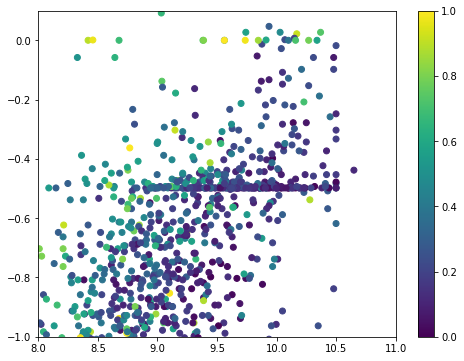

In [81]:
plt.figure()
# check SFR-mstar
%matplotlib inline
x = v.magphys['logMstar_med']
y = v.magphys['logSFR_med']
c = v.magphys['chisq_best']
plt.figure(figsize=(8,6))
chisqflag = v.magphys['chisq_best'] < 1

plt.scatter(x[goodflag & chisqflag],y[goodflag & chisqflag],c=c[goodflag& chisqflag],vmin=0,vmax=1)
plt.colorbar()

badflag = y == 0
#plt.plot(x[goodflag & badflag],y[goodflag & badflag],'b.',alpha=.4)


#badflag = y == -.498
#plt.plot(x[goodflag & badflag],y[goodflag & badflag],'r.',alpha=.4)
#plt.axis([5,11,-5,1])
plt.axis([8,11,-1,.1])

# Looking at galaxies with SFR = -0.498

In [82]:
badflag2 = y == -.498

v.main['prefix','objname'][goodflag & badflag2]
#plt.plot(x[goodflag & badflag],y[goodflag & badflag],'r.',alpha=.4)
#plt.axis([8,11,-1,.1])

<Table length=144>
      prefix      objname 
     bytes36      bytes28 
----------------- --------
 VFID0011-NGC3155  NGC3155
  VFID0031-IC0529   IC0529
VFID0100-UGC06552 UGC06552
 VFID0117-NGC6236  NGC6236
VFID0125-UGC03771 UGC03771
VFID0141-UGC06711 UGC06711
 VFID0233-NGC6140  NGC6140
 VFID0298-NGC4481  NGC4481
VFID0304-UGC07179 UGC07179
VFID0309-UGC10334 UGC10334
              ...      ...
VFID6131-UGC05377 UGC05377
  VFID6157-IC1024   IC1024
 VFID6179-NGC4799  NGC4799
 VFID6246-NGC4900  NGC4900
 VFID6643-NGC4904  NGC4904
VFID6666-UGC10288 UGC10288
 VFID6708-NGC4592  NGC4592
VFID6745-UGC06402 UGC06402
 VFID6761-NGC5334  NGC5334
VFID6770-UGC07883 UGC07883

In [83]:
x = ['a','b','c']

In [88]:
print(*x)

a b c
